# Telecom Churn Prediction

**Author:** Mallika Bera & Mamatha K

# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [4]:
!pip install xgboost

In [5]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

# Statsmodels
import statsmodels.api as sm

# Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

#Sklearn
import sklearn
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import classification_report
from sklearn .metrics import roc_auc_score
from sklearn.metrics import roc_curve , RocCurveDisplay
from sklearn import model_selection
from sklearn.metrics import accuracy_score
# Imporing SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.linear_model import LassoCV

# Statmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# XGBoost
import xgboost as xgb

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [6]:
data = pd.read_csv(r"C:\Users\Saurabh\OneDrive\AI_ML\ML 2\train.csv")
unseen = pd.read_csv(r"C:\Users\Saurabh\OneDrive\AI_ML\ML 2\test.csv")
sample = pd.read_csv(r"c:\Users\Saurabh\OneDrive\AI_ML\ML 2\sample.csv")
data_dict = pd.read_csv(r"C:\Users\Saurabh\OneDrive\AI_ML\ML 2\data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(11, 5)


In [7]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


1. Lets analyze the data dictionary versus the churn dataset.
2. The data dictonary contains a list of abbrevations which provide you all the information you need to understand what a specific feature/variable in the churn dataset represents


In [8]:
data_dict

,RFE,model,Train score,Test Score,AUC
0,RandomForestClassifier,DecisionTreeClassifier,0.997,0.897,NaN
1,RFE,LogisticRegression,0.908,0.910,NaN
2,LogisticRegression,DecisionTreeClassifier,0.993,0.892,NaN
3,RandomForestClassifier,LogisticRegression,0.905,0.906,NaN
4,GradientBoostingClassifier,LogisticRegression,0.901,0.904,NaN
5,PCA,XGBoost,0.901,0.904,NaN
6,PCA,LogisticRegression,0.830,0.830,0.83
7,PCA + GridSearchCV,LogisticRegression,0.830,0.830,0.83
8,NaN,DecisionTreeClassifier,0.880,0.890,0.81
9,PCA,DecisionTreeClassifier,0.830,0.830,0.72


In [9]:
# Checking the dataset information
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

# 2. Cleaning the training data

In [10]:
# Statistical analysis of the numercial columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.0,17499.5,34999.0,52498.5,69998.00
circle_id,69999.0,109.000000,0.000000,109.0,109.0,109.0,109.0,109.00
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
std_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...
aon,69999.0,1220.639709,952.426321,180.0,468.0,868.0,1813.0,4337.00
aug_vbc_3g,69999.0,68.108597,269.328659,0.0,0.0,0.0,0.0,12916.22
jul_vbc_3g,69999.0,65.935830,267.899034,0.0,0.0,0.0,0.0,9165.60
jun_vbc_3g,69999.0,60.076740,257.226810,0.0,0.0,0.0,0.0,11166.21


We can see that many of the columns are having min, max, mean as 0.0. This can happen when all the entries for that column is null. 
So , we need to clean the data before we can start building our model.

In [11]:
# Checking for features/columns with all entries as 0 , NaN or unique values (zero variance). These columns will not be useful for our analysis.

unique_counts = data.nunique()
data_unique_columns = unique_counts[unique_counts == 1].index
data_unique_columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [12]:
# Verifying data for the unique columns before dropping the features.
data[data_unique_columns]

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Looking at the dataset we can confirm that these columns does not show any variance in the data and can be excluded from our analysis.

#Dropping columns with unique values.
data.drop(data_unique_columns, axis=1, inplace = True)

In [14]:
# Rechecking shape of the dataframe
data.shape

(69999, 159)

Now lets check the Date Time fields for better clarity

In [15]:
# Extracting features of type object to look for date columns.
object_columns = data.select_dtypes(include='object')
object_columns

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...
69994,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [16]:
# Correcting the datetime format
for col in object_columns:
    data[col]=pd.to_datetime(data[col] , infer_datetime_format=True)
    data['day_'+col[5:]] = data[col].dt.day  # Extracting day from the date
    data['mon_'+col[5:]] = data[col].dt.month # Extracting month from the date

# Dropping the date column as the information has been captured already
data.drop(object_columns,axis=1,inplace=True)

Next, let us check if there is any missing value in the dataset. This time we will use missingno for the missing values.

<Axes: >

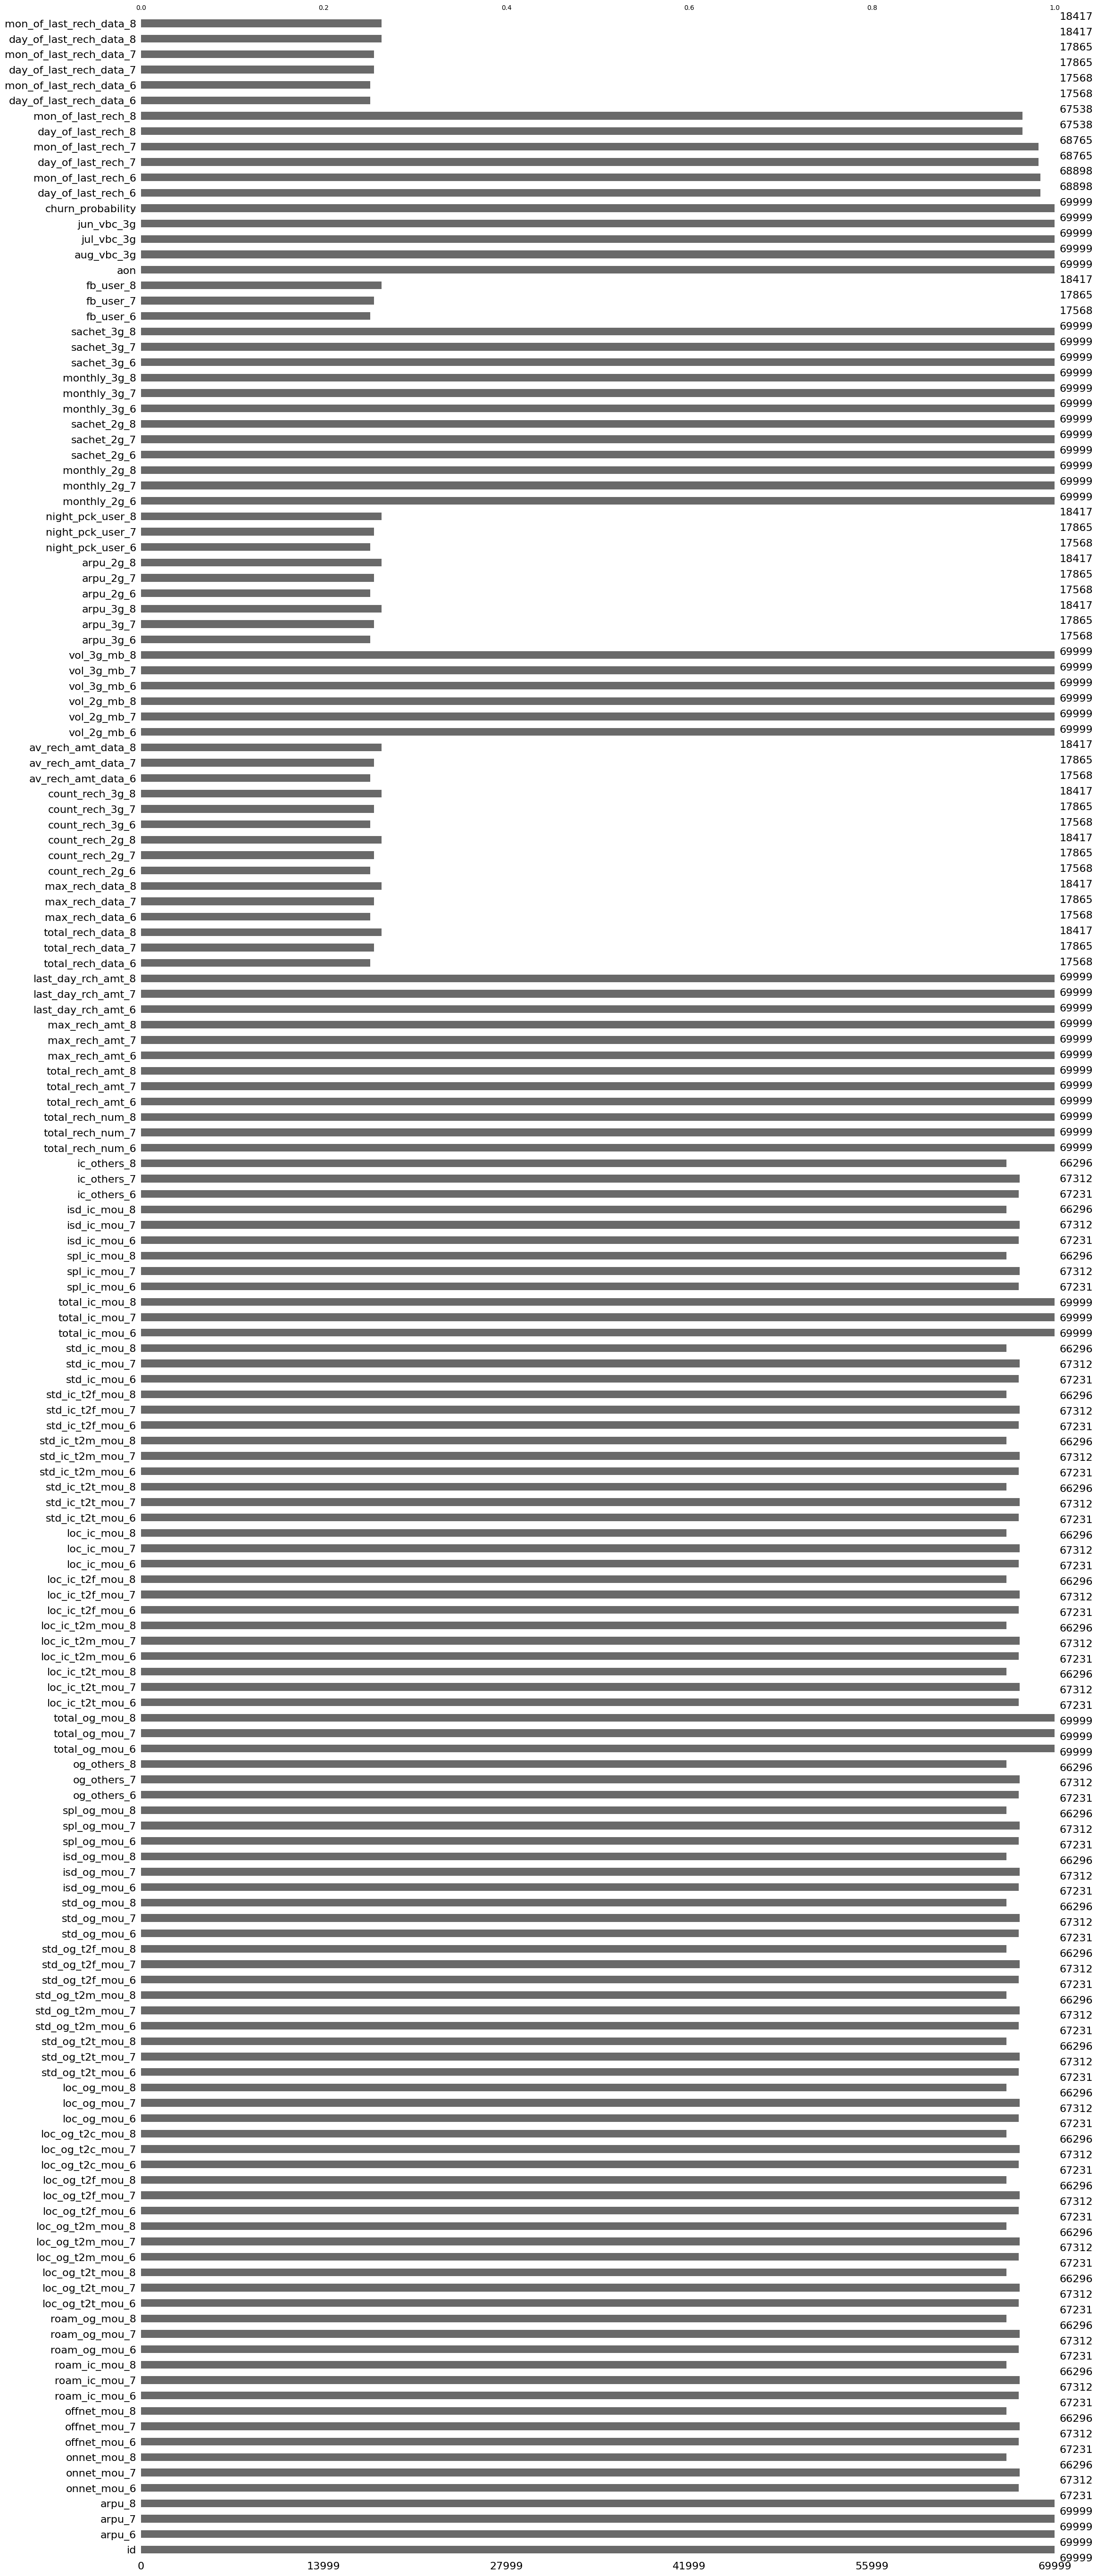

In [17]:
msno.bar(data)

<Axes: >

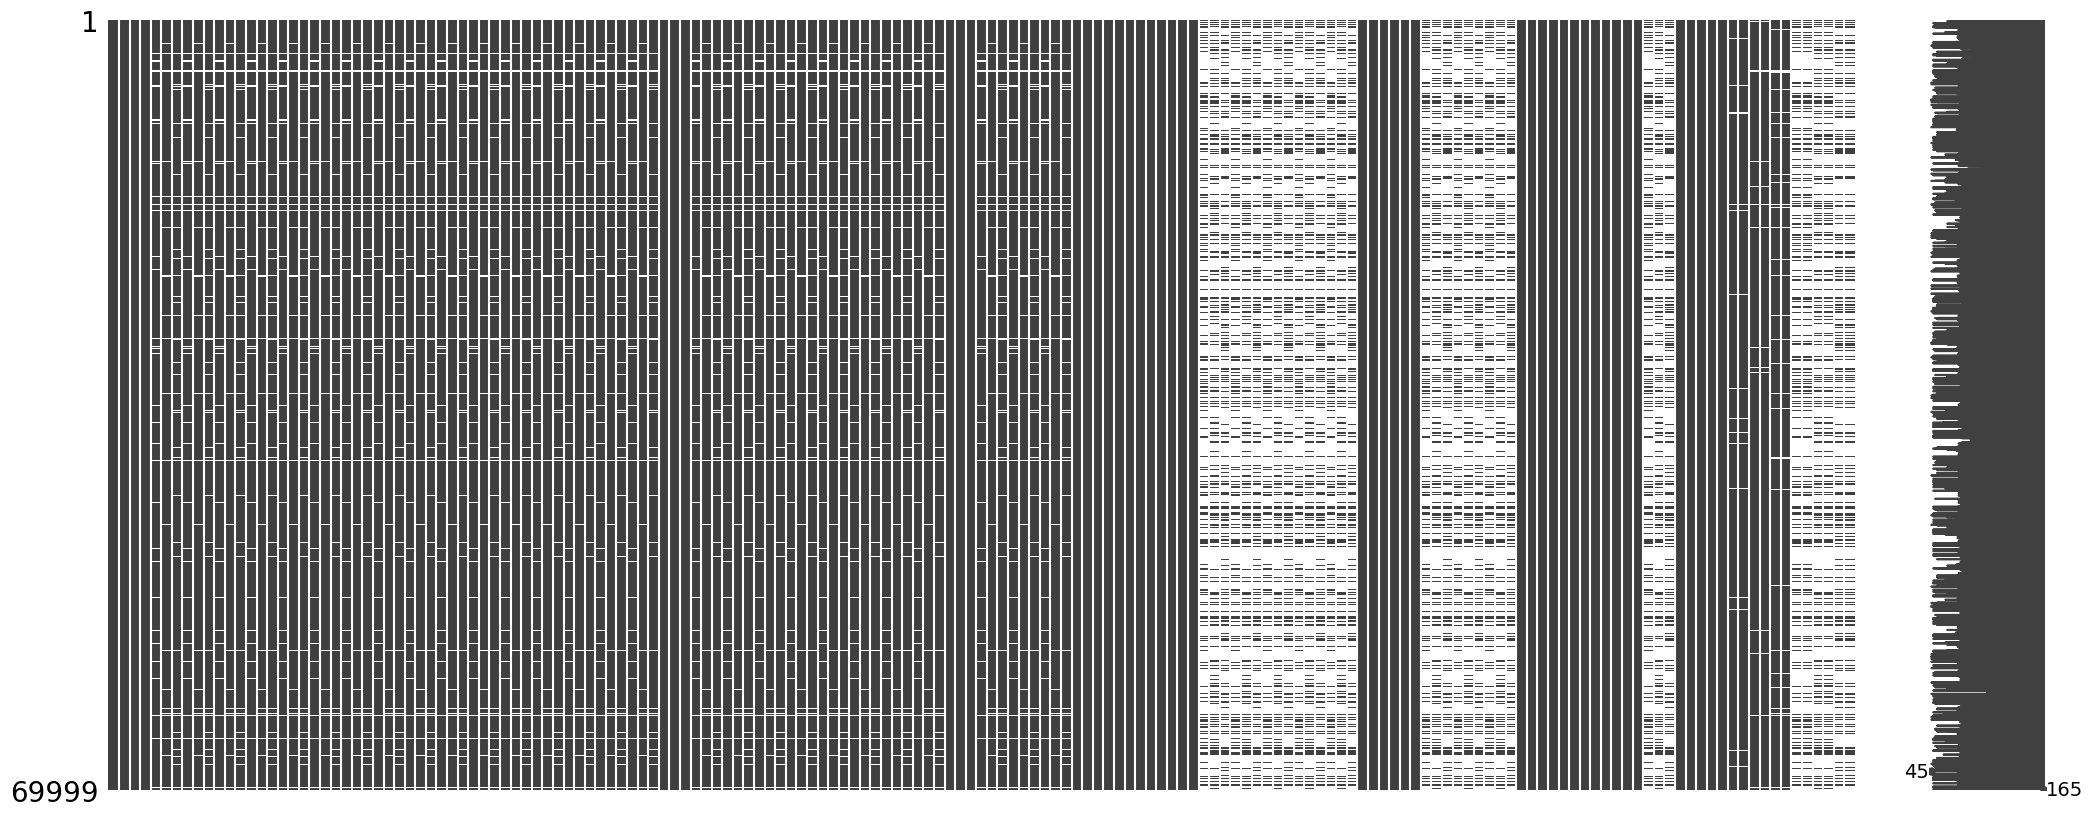

In [18]:
msno.matrix(data)

Lets also calculate the % missing data for each column:

In [19]:
missing_data_percent = 100*data.isnull().sum()/len(data.index)
missing_data_percent.sort_values(ascending=False)


arpu_3g_6                  74.902499
night_pck_user_6           74.902499
max_rech_data_6            74.902499
av_rech_amt_data_6         74.902499
mon_of_last_rech_data_6    74.902499
                             ...    
total_ic_mou_7              0.000000
total_ic_mou_6              0.000000
monthly_2g_6                0.000000
last_day_rch_amt_7          0.000000
id                          0.000000
Length: 165, dtype: float64

Since too much missing information would make a column not really a great predictor for churn, we drop these columns and keep only the ones which have less than 30% missing data.

In [20]:
new_vars = missing_data_percent[missing_data_percent.le(30)].index
new_vars

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability',
       'day_of_last_rech_6', 'mon_of_last_rech_6', 'day_of_last_rech_7',
       'mon_of_last_rech_7', 'day_of_last_rech_8', 'mon_of_last_rech_8'],
      dtype='object', length=132)

In [21]:
data_filtered = data[new_vars]
data_filtered.shape

(69999, 132)

In [22]:
# Calculating the missing value percentage on the data set
missing_data_percent = data_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In our case, the values are missing because some of the customers have not used features such as 'calls within same network operator', 'calls outside the operator T Network' etc.
Hence these are meaningful and can be replaced with 0.

In [23]:
# Replacing the missing values with constant 0.

imp = SimpleImputer(strategy='constant', fill_value=0)
data_filtered[impute_cols] = imp.fit_transform(data_filtered[impute_cols])

<Axes: >

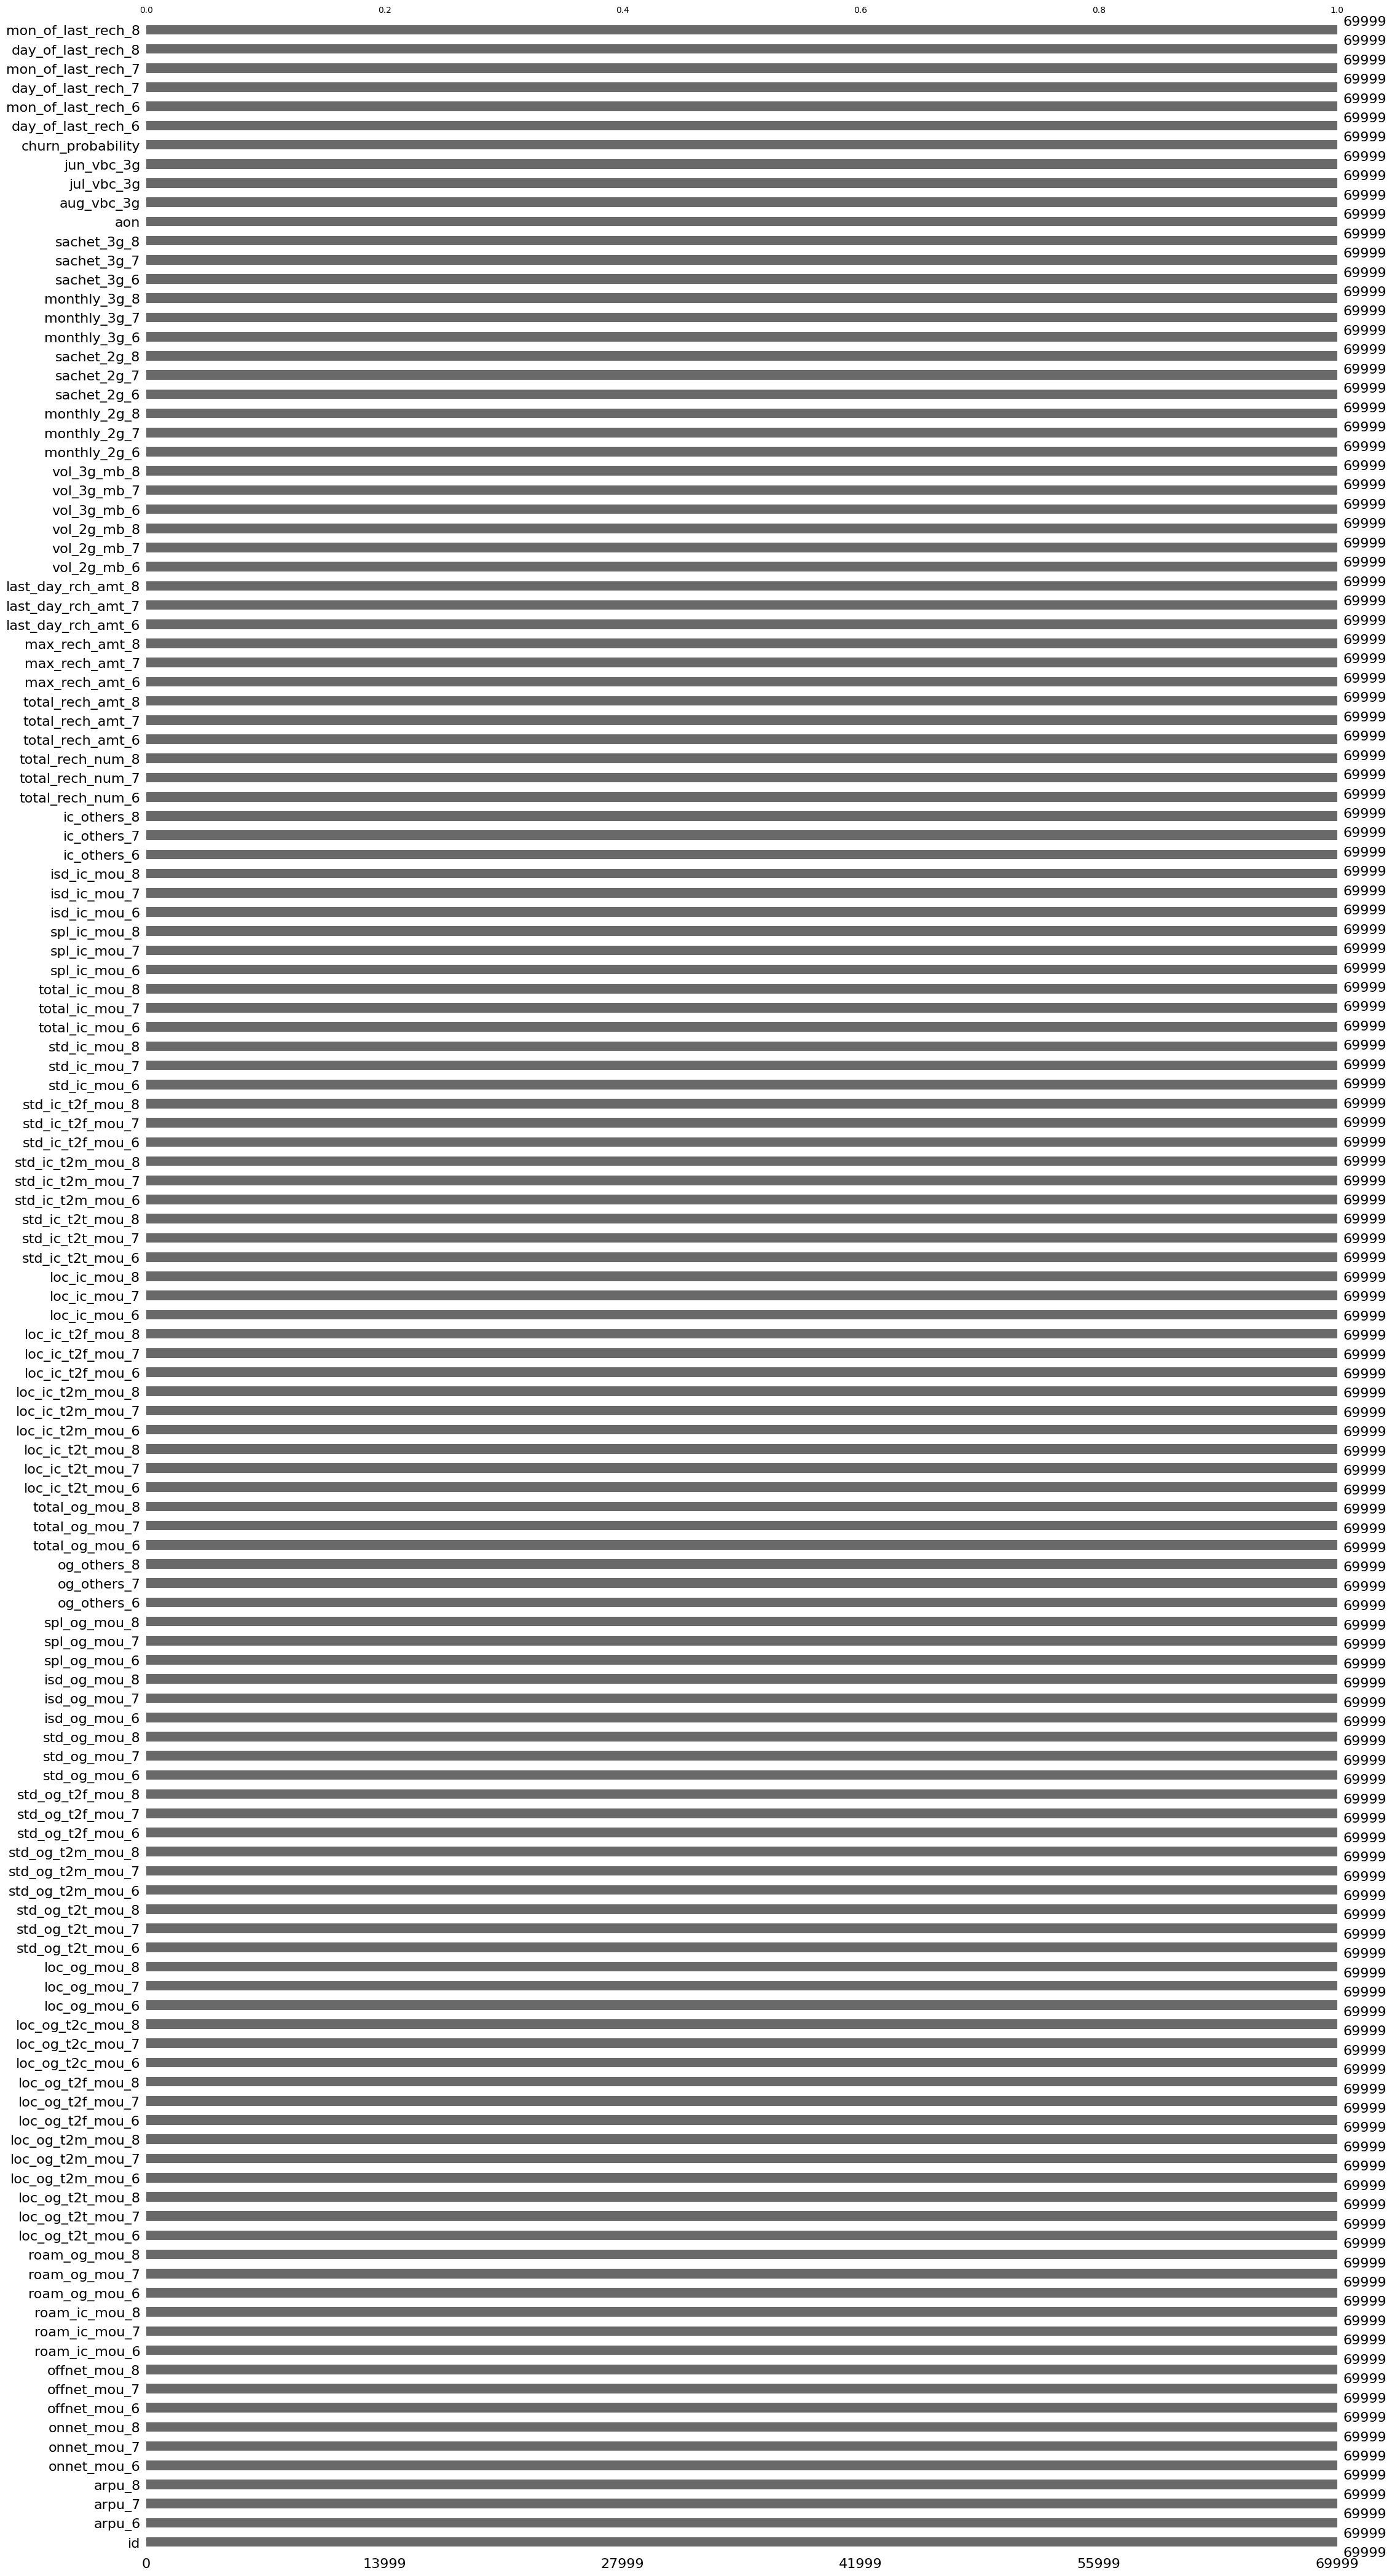

In [24]:
# Rechecking the value count for missing values
msno.bar(data_filtered)

We do not see any missing values in our training data set now.

In [25]:
# Summarizing the cleaned dataset
data_filtered.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,mon_of_last_rech_6,day_of_last_rech_7,mon_of_last_rech_7,day_of_last_rech_8,mon_of_last_rech_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,...,68.108597,65.935830,60.07674,0.101887,23.748625,5.905627,25.056072,6.876598,24.547508,7.718739
std,20207.115084,334.213918,344.366927,351.924315,295.115497,306.326345,304.990552,312.900706,318.492632,318.453812,...,269.328659,267.899034,257.22681,0.302502,6.786483,0.746551,6.627534,0.921193,7.612726,1.473436
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.500000,93.581000,86.714000,84.095000,5.430000,4.910000,4.110000,28.790000,26.690000,23.780000,...,0.000000,0.000000,0.00000,0.000000,20.000000,6.000000,22.000000,7.000000,24.000000,8.000000
50%,34999.000000,197.484000,191.588000,192.234000,30.830000,29.160000,27.840000,89.810000,85.590000,83.010000,...,0.000000,0.000000,0.00000,0.000000,27.000000,6.000000,27.000000,7.000000,27.000000,8.000000
75%,52498.500000,370.791000,365.369500,369.909000,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,...,0.000000,0.000000,0.00000,0.000000,29.000000,6.000000,30.000000,7.000000,30.000000,8.000000
max,69998.000000,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,...,12916.220000,9165.600000,11166.21000,1.000000,30.000000,6.000000,31.000000,7.000000,31.000000,8.000000


# 3. Exploratory Data Analysis & Preprocessing



### 3.1 Handling outliers

Before we start the EDA, we need to check for all outliners in the dataset as it can impact on the accuracy of our analysis. 
For our analysis, we have used k-sigma method to cap the outliners.

In [26]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
data_filtered.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,mon_of_last_rech_6,day_of_last_rech_7,mon_of_last_rech_7,day_of_last_rech_8,mon_of_last_rech_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,...,68.108597,65.935830,60.07674,0.101887,23.748625,5.905627,25.056072,6.876598,24.547508,7.718739
std,20207.115084,334.213918,344.366927,351.924315,295.115497,306.326345,304.990552,312.900706,318.492632,318.453812,...,269.328659,267.899034,257.22681,0.302502,6.786483,0.746551,6.627534,0.921193,7.612726,1.473436
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.500000,93.581000,86.714000,84.095000,5.430000,4.910000,4.110000,28.790000,26.690000,23.780000,...,0.000000,0.000000,0.00000,0.000000,20.000000,6.000000,22.000000,7.000000,24.000000,8.000000
50%,34999.000000,197.484000,191.588000,192.234000,30.830000,29.160000,27.840000,89.810000,85.590000,83.010000,...,0.000000,0.000000,0.00000,0.000000,27.000000,6.000000,27.000000,7.000000,27.000000,8.000000
75%,52498.500000,370.791000,365.369500,369.909000,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,...,0.000000,0.000000,0.00000,0.000000,29.000000,6.000000,30.000000,7.000000,30.000000,8.000000
90%,62998.200000,619.993800,615.661400,614.994600,331.766000,334.886000,326.298000,468.898000,470.054000,467.636000,...,160.444000,136.272000,110.32800,1.000000,30.000000,6.000000,31.000000,7.000000,31.000000,8.000000
95%,66498.100000,832.022700,823.236700,828.464700,598.600000,608.878000,596.125000,719.500000,731.602000,715.915000,...,464.277000,446.353000,400.13400,1.000000,30.000000,6.000000,31.000000,7.000000,31.000000,8.000000
99%,69298.020000,1400.276640,1414.891380,1445.054800,1429.040400,1461.342200,1448.891000,1520.310000,1517.838600,1492.232400,...,1226.659800,1254.279000,1188.26780,1.000000,30.000000,6.000000,31.000000,7.000000,31.000000,8.000000


In [27]:
# Function to cap the outliners
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [28]:
# Removing the outliners
data_filtered1 = data_filtered.apply(cap_outliers, axis=0)
data_filtered1

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,mon_of_last_rech_6,day_of_last_rech_7,mon_of_last_rech_7,day_of_last_rech_8,mon_of_last_rech_8
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0.00,0.00000,0.000000,0,22.0,6.0,10.0,7.0,24.0,8.0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,0.00,0.00000,0.000000,0,12.0,6.0,10.0,7.0,26.0,8.0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0.00,0.00000,0.000000,0,11.0,6.0,22.0,7.0,24.0,8.0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0.00,0.00000,0.000000,0,15.0,6.0,21.0,7.0,25.0,8.0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0.00,0.00000,0.000000,0,25.0,6.0,26.0,7.0,30.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,69994,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,...,0.00,0.00000,0.000000,0,18.0,6.0,31.0,7.0,31.0,8.0
69995,69995,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,...,0.00,0.00000,0.000000,0,28.0,6.0,31.0,7.0,27.0,8.0
69996,69996,372.088,258.374,279.782,77.13,68.44,78.44,335.54,227.94,263.84,...,0.00,0.00000,0.000000,0,25.0,6.0,30.0,7.0,29.0,8.0
69997,69997,238.575,245.414,145.062,14.01,7.64,6.71,30.34,16.68,12.56,...,664.25,869.63293,831.757171,0,29.0,6.0,19.0,7.0,26.0,8.0


### 3.2 Univariate Analysis

We will now perform univariate analysis on the features to check if they have any visible pattern with respect to the churn rate.

Text(0.5, 1.0, 'Count of CHURN variable')

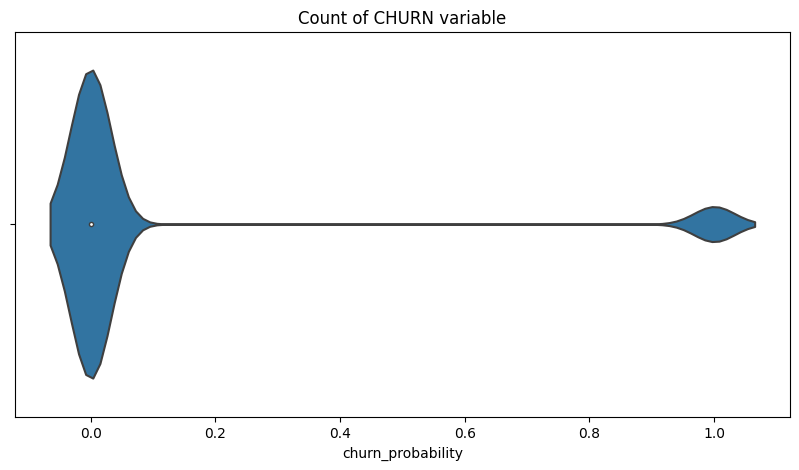

In [29]:
# Checking the distribution of Churned customers in the training dataset.
plt.figure(figsize=(10,5))
sns.violinplot(x='churn_probability', data=data_filtered1)
plt.title("Count of CHURN variable")

Observation: Less number of customers with higher churning probability. There can be a class imbalance.

As per the problem statement, the first two months are customers' good phase and the next month is action phase.
For our Univariate Analysis, we have categorized the columns into following sections:

- Churn probability trend on recharge amount in good phase and action phase : Average revenue per user and total recharge Amount
- Churn probability with respect to Age on network  number of days the customer is using the operator T network
- Churn probability varying with count of recharges every month
- Churn probability rate with respect to customer usage pattern : MOU outgoing, MOU incoming

In [30]:
# Checking if the churn probability depends on Average revenue per user , total recharge and max recharge amount

# Deriving columns for the univariate analysis
data_filtered1['average_Rev_good'] = data_filtered1['arpu_6'] + data_filtered1['arpu_7']
data_filtered1['total_recharge_good'] = data_filtered1['total_rech_amt_6'] + data_filtered1['total_rech_amt_7']

[Text(0, 0.5, 'average rev')]

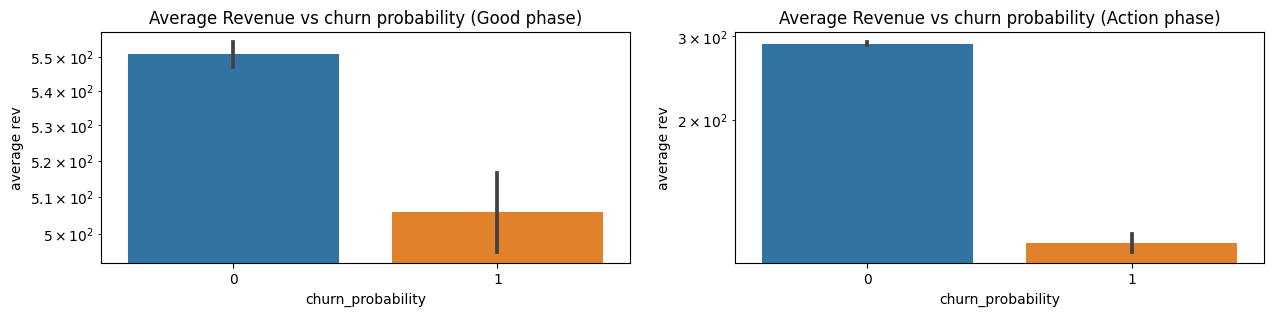

In [31]:
# Data plotting for visualization : Customer Average Revenue
fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(data=data_filtered1, x = 'churn_probability', y='average_Rev_good')
ax1.set(title = 'Average Revenue vs churn probability (Good phase)')
#ax1.legend(["No-Churn","Churn"],loc='upper right')
plt.yscale('log')
ax1.set(ylabel= 'average rev')

ax1 = fig.add_subplot(1, 2, 2)
ax1 = sns.barplot(data=data_filtered1, x = 'churn_probability', y='arpu_8')
ax1.set(title = 'Average Revenue vs churn probability (Action phase)')
#ax1.legend(["No-Churn","Churn"],loc='upper right')
plt.yscale('log')
ax1.set(ylabel= 'average rev')

Observation : During the first two months, the chances of a customer to stop the service is almost same as happy customers but he chances decrease significantly in the action phase. If a customer does not churn in the first two months, he is more likely to continue the service in the next months.

[Text(0, 0.5, 'average rev')]

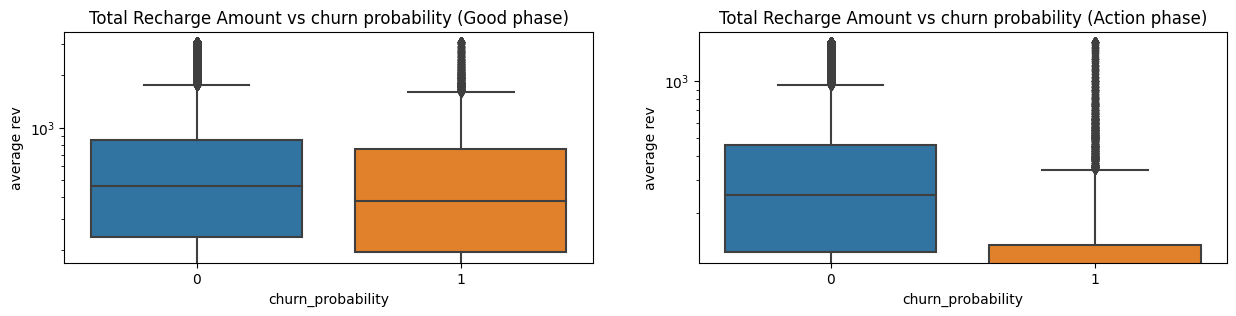

In [32]:
# Data plotting for visualization : Customer Total Recharge
fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.boxplot(data=data_filtered1, x = 'churn_probability', y='total_recharge_good')
ax1.set(title = 'Total Recharge Amount vs churn probability (Good phase)')
#ax1.legend(["No-Churn","Churn"],loc='upper right')
plt.yscale('log')
ax1.set(ylabel= 'average rev')

ax1 = fig.add_subplot(1, 2, 2)
ax1 = sns.boxplot(data=data_filtered1, x = 'churn_probability', y='total_rech_amt_8')
ax1.set(title = 'Total Recharge Amount vs churn probability (Action phase)')
#ax1.legend(["No-Churn","Churn"],loc='upper right')
plt.yscale('log')
ax1.set(ylabel= 'average rev')

Observation : During the good phase (initial 2 months, the churn probability is almost same as non-churn probability), during the action phase, the churn probability decreases.

In [33]:
# Dropping off the columns average_Rev_good and total_recharge_good as they are derived only for our EDA.

data_filtered1.drop(['average_Rev_good','total_recharge_good'],axis=1,inplace=True)

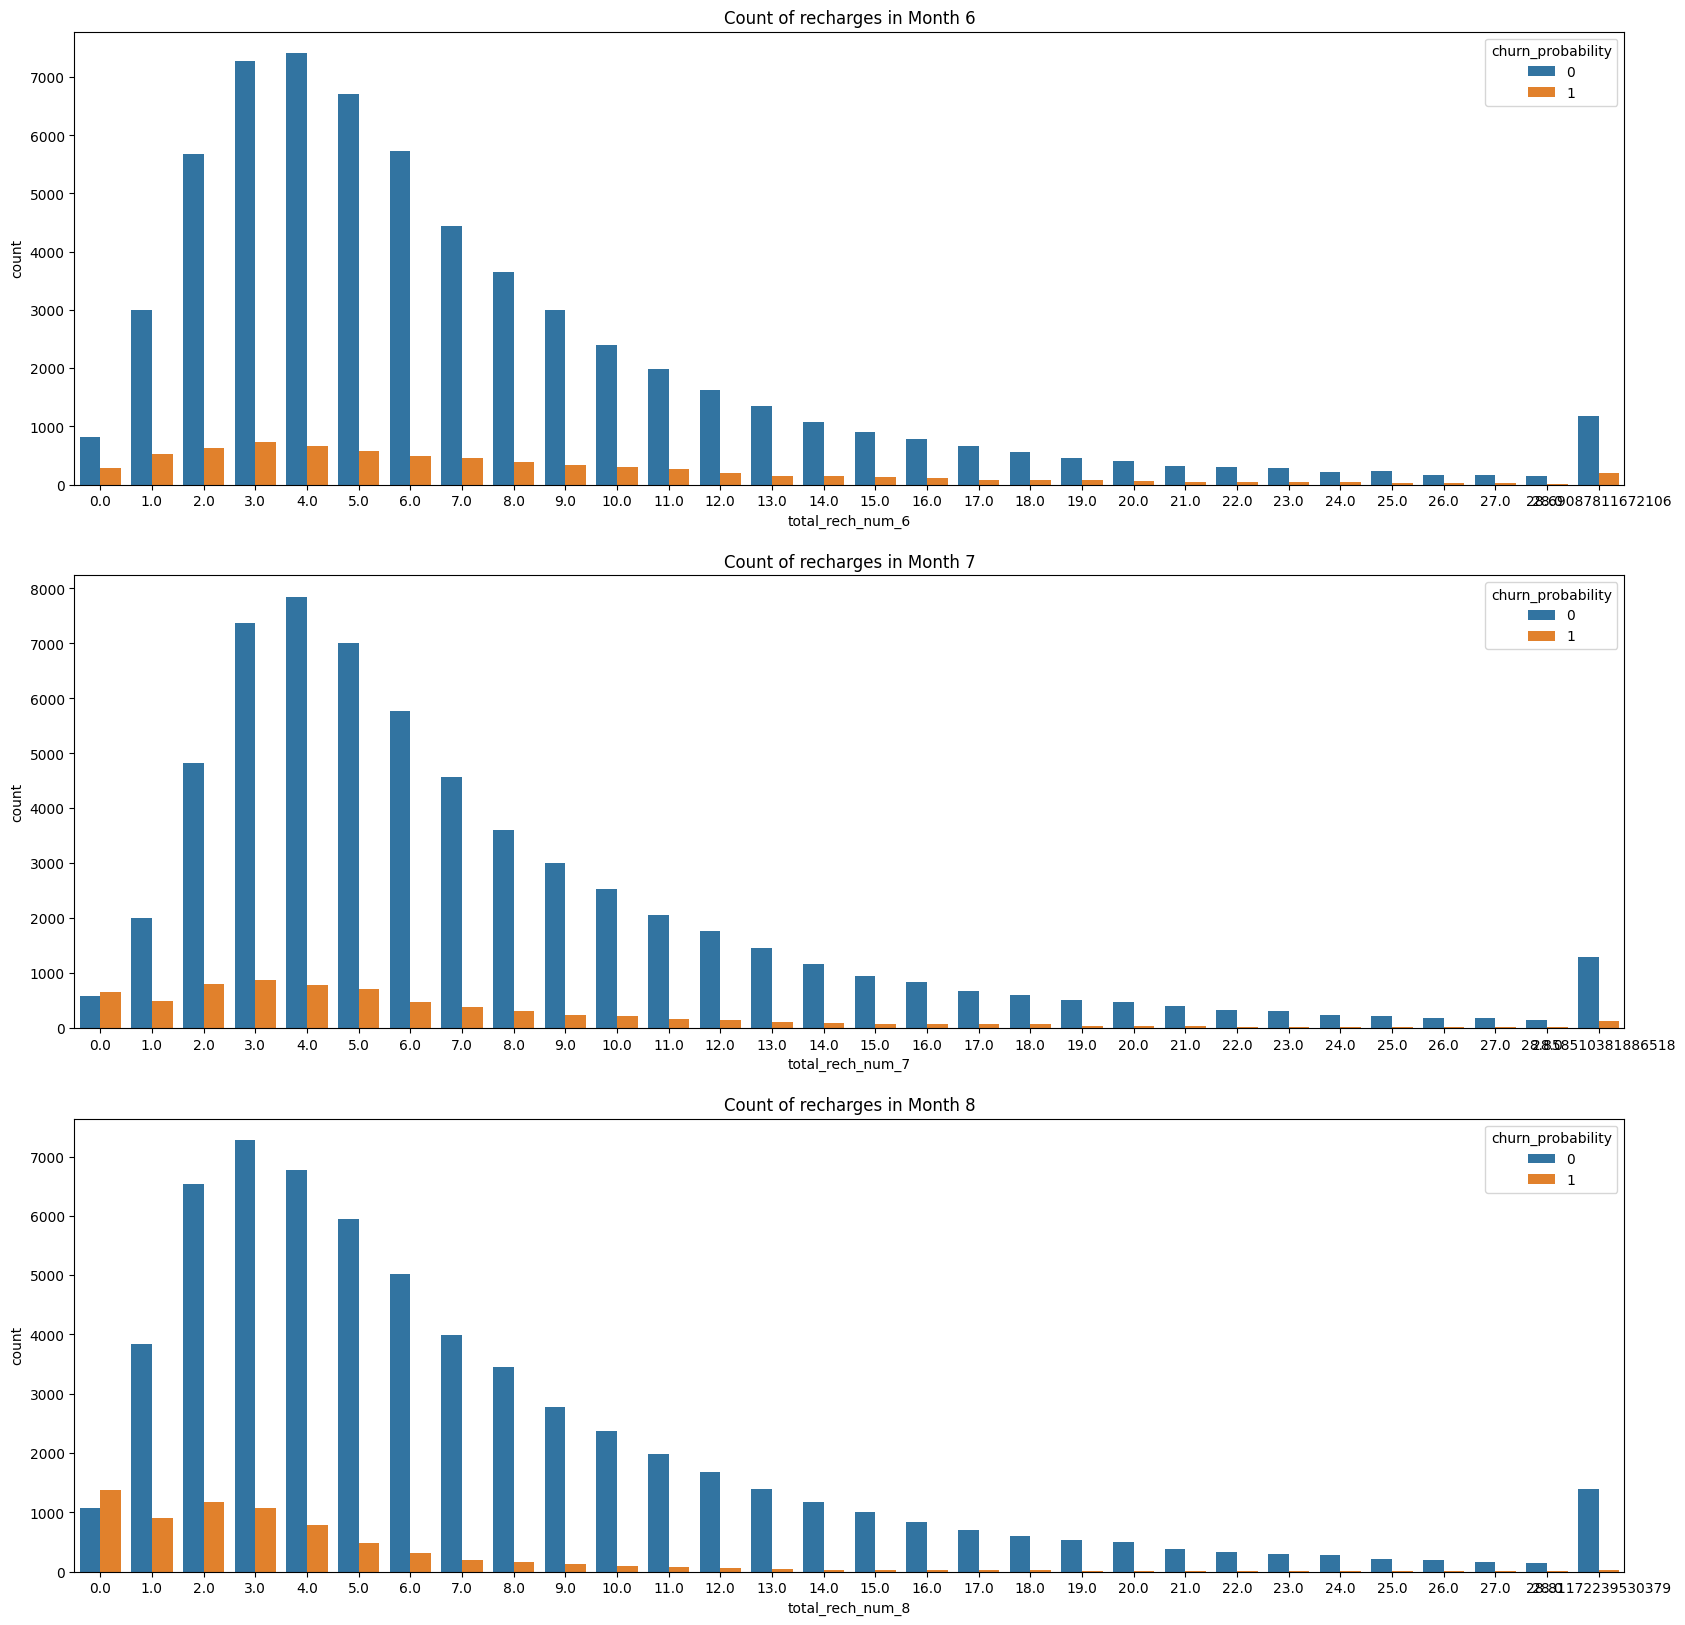

In [34]:
# Data plotting for visualization - total count of recharges for month 6 , 7 and 8
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(3, 1, 1)
ax1 = sns.countplot(data = data_filtered1 , x="total_rech_num_6", hue='churn_probability')
ax1.set(title = 'Count of recharges in Month 6')

ax2 = fig.add_subplot(3, 1, 2)
ax2 = sns.countplot(data = data_filtered1 , x="total_rech_num_7", hue='churn_probability')
ax2.set(title = 'Count of recharges in Month 7')

ax3 = fig.add_subplot(3, 1, 3)
ax3 = sns.countplot(data = data_filtered1 , x="total_rech_num_8", hue='churn_probability')
ax3.set(title = 'Count of recharges in Month 8')
plt.show()

Observation: Unlike the previous parameters, here we can see that churn probability increases for customers with count of recharges between 0 to 4 during the action phase.

In [35]:
# Checking if the churn probability depends on usage behaviour of customers.

# Deriving columns for the univariate analysis
data_filtered1['total_mou_og'] = data_filtered1['total_og_mou_6'] + data_filtered1['total_og_mou_7'] + data_filtered1['total_og_mou_8']
data_filtered1['total_ic_mou'] = data_filtered1['total_ic_mou_6'] + data_filtered1['total_ic_mou_7'] + data_filtered1['total_ic_mou_8']

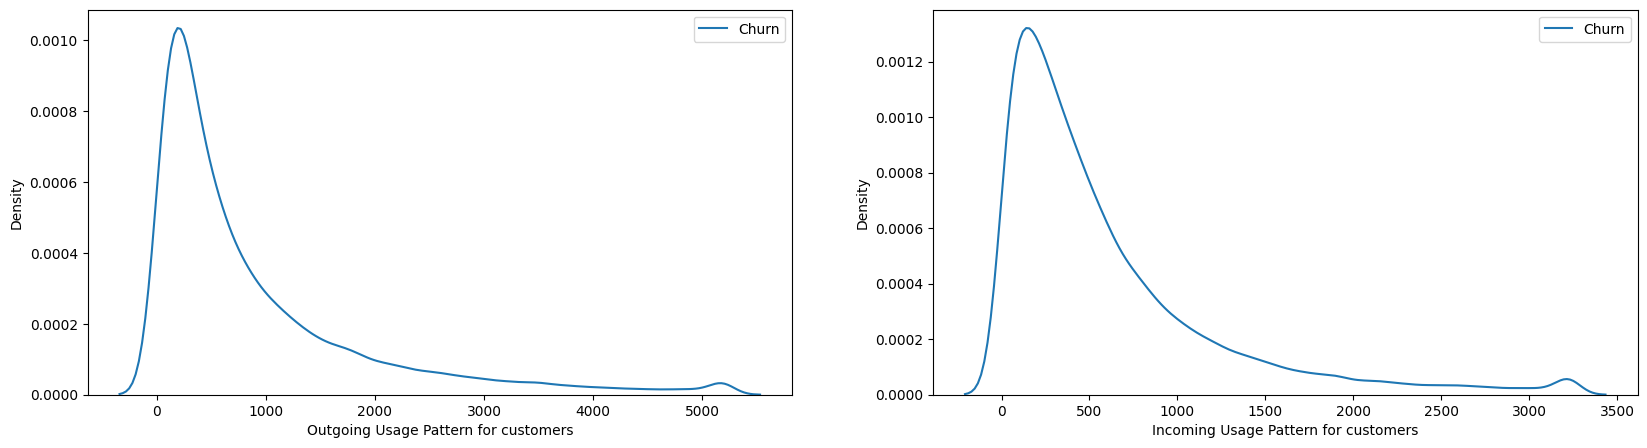

In [36]:
# Data plotting for visualization - total MOU for month 6 , 7 and 8
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.distplot(data_filtered1[data_filtered1.churn_probability == 0 ]['total_mou_og'],label='non churn',hist=False)
ax1.set(xlabel='Outgoing Usage Pattern for customers')
ax1.legend(["Churn","No-Churn"],loc='upper right')

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.distplot(data_filtered1[data_filtered1.churn_probability == 0 ]['total_ic_mou'],label='non churn',hist=False)
ax2.set(xlabel='Incoming Usage Pattern for customers')
ax2.legend(["Churn","No-Churn"],loc='upper right')
plt.show()

Observation: Churn probability is very high for customers with low outgoing and incoming usages.

In [37]:
# Dropping the derived columns
data_filtered1.drop(['total_mou_og','total_ic_mou'],axis=1,inplace=True)

All the features show right skewed distribution. We can not use any Linear Regression Model here. Log transformation can be a good choice here.

### 3.3 Bivariate Analysis

<Axes: >

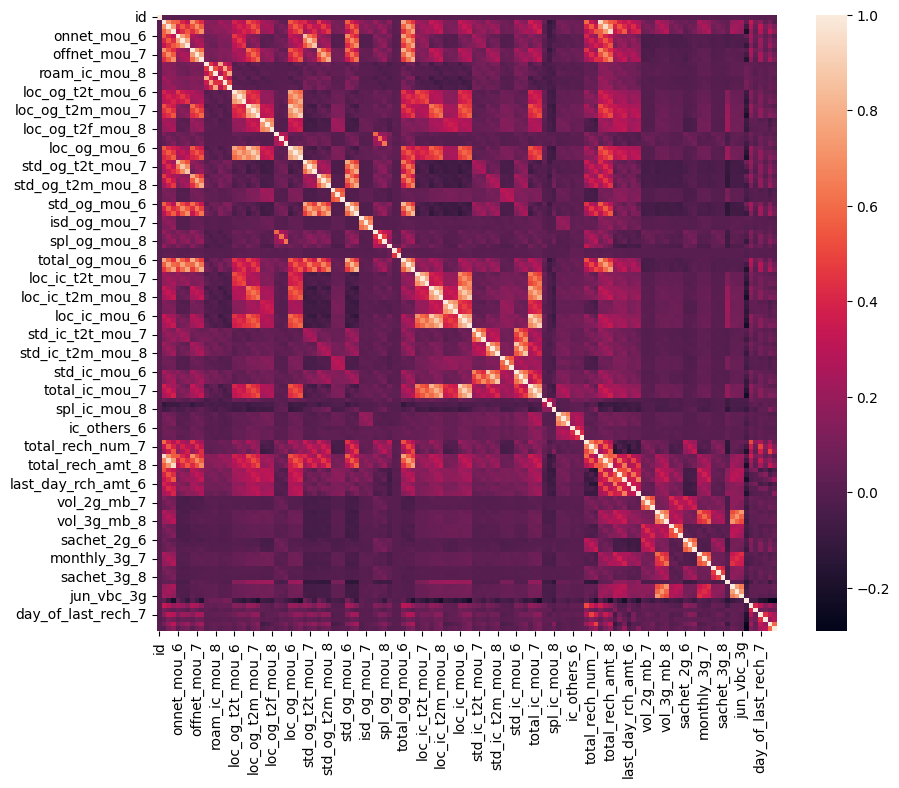

In [38]:
# Checking correlation among independent variables
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(data_filtered1, columns=new_vars).corr())

Too many features show high correlation among each other. The number of features in our dataset being too many, it is very difficult to identify and remove the correlated variables manually. Instead, we will try to perform some dimentionality reduction techniques to handle the multicollinearity problem.

# 4. Train-Test Data



### 4.1 Train-test Split

Since we have good number of data available, we can split the dataset for our model training and evaluation. 

In [39]:
# Splitting into X and y
X = data_filtered.drop('churn_probability',axis=1)
y = data_filtered['churn_probability']

In [40]:
# Splitting into train and test sets.
X_train_filtered, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=100)

X_train_filtered.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 131), (14000, 131), (55999,), (14000,))

In [41]:
X_test_main = X_test
y_test_main = y_test

In [42]:
y_train = y_train.apply(lambda x: 1 if x>0 else 0)

In [43]:
y_train.value_counts()

churn_probability
0    50259
1     5740
Name: count, dtype: int64

### 4.2 Feature scaling

Lets also scale the features by scaling them with Standard scaler 

In [44]:
num_col = X_train_filtered.select_dtypes(include = ['int64','float64']).columns.tolist()
scale = StandardScaler()
X_train_filtered[num_col] = scale.fit_transform(X_train_filtered[num_col])

In [45]:
X_train_filtered.shape

(55999, 131)

### 4.3 Handling data imbalance

In [46]:
# Instantiate SMOTE
smt = SMOTE(random_state=42)

In [47]:
# Fitting SMOTE to the train set
X_train_smt, y_train_smt = smt.fit_resample(X_train_filtered,y_train)

In [48]:
# Scaling the test set
X_test[num_col] = scale.transform(X_test[num_col])

# 5. Model Building

## 5.1. Logistic Regression with RFE

### 5.1.1 Instantiating Model

In [49]:
# Logistic regression model
logm1 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100518
Model:                            GLM   Df Residuals:                   100386
Model Family:                Binomial   Df Model:                          131
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36952.
Date:                Wed, 11 Dec 2024   Deviance:                       73903.
Time:                        18:07:52   Pearson chi2:                 2.47e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4785
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1141      0.020   -104.479      0.000      -2.154      -2.074
id                     0.0053      0.010      0.540      0.589      -0.014       0.025
arpu_6                 0.2166      0.046      4.694      0.000       0.126       0.307
arpu_7                 0.2098      0.048      4.385      0.000       0.116       0.304
arpu_8                 0.3996      0.050      7.944      0.000       0.301       0.498
onnet_mou_6           -0.1923      0.076     -2.528      0.011      -0.341      -0.043
onnet_mou_7            0.1338      0.095      1.410      0.159      -0.052       0.320
onnet_mou_8           -0.1474      0.098     -1.505      0.132      -0.339       0.045
offnet_mou_6           0.0068      0.074      0.093      0.926      -0.137       0.151
offnet_mou_7           0.1404      0.090      1.563      0.118      -0.036       0.316
offnet_mou_8          -0.9645      0.088    -10.959      0.000      -1.137      -0.792
roam_ic_mou_6         -0.0100      0.017     -0.604      0.546      -0.042       0.022
roam_ic_mou_7          0.0877      0.016      5.384      0.000       0.056       0.120
roam_ic_mou_8         -0.0058      0.014     -0.397      0.691      -0.034       0.023
roam_og_mou_6          0.0799      0.019      4.224      0.000       0.043       0.117
roam_og_mou_7         -0.0102      0.018     -0.584      0.559      -0.045       0.024
roam_og_mou_8          0.3008      0.018     17.115      0.000       0.266       0.335
loc_og_t2t_mou_6      -0.2167      0.065     -3.328      0.001      -0.344      -0.089
loc_og_t2t_mou_7       0.1991      0.080      2.504      0.012       0.043       0.355
loc_og_t2t_mou_8      -0.9942      0.093    -10.659      0.000      -1.177      -0.811
loc_og_t2m_mou_6      -0.5613      0.095     -5.900      0.000      -0.748      -0.375
loc_og_t2m_mou_7       0.1346      0.111      1.216      0.224      -0.082       0.352
loc_og_t2m_mou_8      -0.6737      0.128     -5.265      0.000      -0.924      -0.423
loc_og_t2f_mou_6      -0.1322      0.022     -6.117      0.000      -0.175      -0.090
loc_og_t2f_mou_7       0.0280      0.024      1.157      0.247      -0.019       0.075
loc_og_t2f_mou_8      -0.0856      0.026     -3.323      0.001      -0.136      -0.035
loc_og_t2c_mou_6      -0.0345      0.014     -2.520      0.012      -0.061      -0.008
loc_og_t2c_mou_7      -0.0024      0.015     -0.166      0.868      -0.031       0.026
loc_og_t2c_mou_8       0.0958      0.017      5.690      0.000       0.063       0.129
loc_og_mou_6           0.7541      0.146      5.166      0.000       0.468       1.040
loc_og_mou_7          -0.5367      0.172     -3.128      0.002      -0.873      -0.200
loc_og_mou_8           1.4883      0.197      7.570      0.000       1.103       1.874
std_og_t2t_mou_6       0.1935      0.0

### 5.1.2 Feature Selection Using RFE

In [50]:
logreg = LogisticRegression()

In [51]:
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_smt, y_train_smt)

In [52]:
# Check features with RFE support
list(zip(X_train_smt.columns, rfe.support_, rfe.ranking_))

[('id', False, 109),
 ('arpu_6', False, 23),
 ('arpu_7', False, 6),
 ('arpu_8', False, 11),
 ('onnet_mou_6', False, 53),
 ('onnet_mou_7', False, 48),
 ('onnet_mou_8', False, 58),
 ('offnet_mou_6', False, 114),
 ('offnet_mou_7', False, 57),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 101),
 ('roam_ic_mou_7', False, 39),
 ('roam_ic_mou_8', False, 110),
 ('roam_og_mou_6', False, 54),
 ('roam_og_mou_7', False, 100),
 ('roam_og_mou_8', False, 2),
 ('loc_og_t2t_mou_6', False, 21),
 ('loc_og_t2t_mou_7', False, 90),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 20),
 ('loc_og_t2m_mou_7', False, 35),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 18),
 ('loc_og_t2f_mou_7', False, 107),
 ('loc_og_t2f_mou_8', False, 59),
 ('loc_og_t2c_mou_6', False, 83),
 ('loc_og_t2c_mou_7', False, 113),
 ('loc_og_t2c_mou_8', False, 46),
 ('loc_og_mou_6', False, 19),
 ('loc_og_mou_7', False, 74),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 52),
 ('std_og_t2t_mo

In [53]:
col = X_train_smt.columns[rfe.support_]

### 5.1.3. Assessing the model with StatsModels

In [54]:
X_train_sm = sm.add_constant(X_train_smt[col])
logm2 = sm.GLM(y_train_smt,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100518
Model:                            GLM   Df Residuals:                   100502
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41621.
Date:                Wed, 11 Dec 2024   Deviance:                       83242.
Time:                        18:10:09   Pearson chi2:                 2.95e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4277
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9150      0.019   -102.425      0.000      -1.952      -1.878
offnet_mou_8           0.4991      0.039     12.841      0.000       0.423       0.575
loc_og_t2t_mou_8      -0.5428      0.070     -7.715      0.000      -0.681      -0.405
loc_og_t2m_mou_8      -0.9704      0.090    -10.743      0.000      -1.147      -0.793
loc_og_mou_8           0.5360      0.127      4.209      0.000       0.286       0.786
std_og_t2t_mou_8       0.3071      0.033      9.316      0.000       0.242       0.372
std_og_mou_8          -0.7115      0.050    -14.324      0.000      -0.809      -0.614
loc_ic_t2t_mou_8      -1.3508      0.059    -22.716      0.000      -1.467      -1.234
loc_ic_t2m_mou_8      -2.5550      0.077    -33.114      0.000      -2.706      -2.404
loc_ic_t2f_mou_8      -0.8525      0.031    -27.666      0.000      -0.913      -0.792
loc_ic_mou_8           1.8245      0.109     16.805      0.000       1.612       2.037
spl_ic_mou_8          -0.9582      0.023    -42.174      0.000      -1.003      -0.914
last_day_rch_amt_8    -0.6469      0.013    -51.594      0.000      -0.671      -0.622
sachet_2g_8           -0.4454      0.014    -31.599      0.000      -0.473      -0.418
aon                   -0.4940      0.011    -43.560      0.000      -0.516      -0.472
day_of_last_rech_8    -0.4872      0.009    -54.397      0.000      -0.505      -0.470
======================================================================================
"""

In [55]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

0    0.778854
1    0.005944
2    0.096406
3    0.002065
4    0.012243
5    0.000688
6    0.959061
7    0.387513
8    0.073311
9    0.151021
dtype: float64

In [56]:
# Reshaping the predicted values on train set
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.78854370e-01, 5.94429029e-03, 9.64058033e-02, 2.06549607e-03,
       1.22430571e-02, 6.88289349e-04, 9.59060866e-01, 3.87513057e-01,
       7.33109641e-02, 1.51020998e-01])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [57]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_smt.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train_smt.index
y_train_pred_final.head()

,Churn,Churn_Prob,ID
0,1,0.778854,0
1,0,0.005944,1
2,0,0.096406,2
3,0,0.002065,3
4,0,0.012243,4


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [58]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted
0,1,0.778854,0,1
1,0,0.005944,1,0
2,0,0.096406,2,0
3,0,0.002065,3,0
4,0,0.012243,4,0


Creating the confusion matrix

In [59]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[39055 11204]
 [ 6160 44099]]


In [60]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.827254820032233


The overall accuracy looks quite good, but we have seen a lot of collinear features in the multivariant analysis. 
We will also check VIFs for all feature variables to reduce chances of multicollinearity and improve the model

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[col].astype(float).values, i) for i in range(X_train_smt[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_mou_8,49.36
9,loc_ic_mou_8,48.23
2,loc_og_t2m_mou_8,26.29
7,loc_ic_t2m_mou_8,25.36
5,std_og_mou_8,18.63
0,offnet_mou_8,12.67
1,loc_og_t2t_mou_8,11.20
6,loc_ic_t2t_mou_8,9.15
4,std_og_t2t_mou_8,8.65
8,loc_ic_t2f_mou_8,2.08


We can see very high VIF value for 'loc_og_mou_8'. So we will drop this column and rerun the model

In [62]:
col = col.drop('loc_og_mou_8', 1)

In [63]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smt[col])
logm3 = sm.GLM(y_train_smt,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100518
Model:                            GLM   Df Residuals:                   100503
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41629.
Date:                Wed, 11 Dec 2024   Deviance:                       83258.
Time:                        18:10:11   Pearson chi2:                 2.93e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4277
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9136      0.019   -102.376      0.000      -1.950      -1.877
offnet_mou_8           0.5175      0.039     13.312      0.000       0.441       0.594
loc_og_t2t_mou_8      -0.2708      0.025    -10.657      0.000      -0.321      -0.221
loc_og_t2m_mou_8      -0.6169      0.033    -18.777      0.000      -0.681      -0.553
std_og_t2t_mou_8       0.3207      0.033      9.723      0.000       0.256       0.385
std_og_mou_8          -0.7356      0.050    -14.808      0.000      -0.833      -0.638
loc_ic_t2t_mou_8      -1.3777      0.059    -23.214      0.000      -1.494      -1.261
loc_ic_t2m_mou_8      -2.5866      0.077    -33.559      0.000      -2.738      -2.436
loc_ic_t2f_mou_8      -0.8495      0.031    -27.559      0.000      -0.910      -0.789
loc_ic_mou_8           1.8611      0.109     17.128      0.000       1.648       2.074
spl_ic_mou_8          -0.9580      0.023    -42.175      0.000      -1.003      -0.914
last_day_rch_amt_8    -0.6472      0.013    -51.572      0.000      -0.672      -0.623
sachet_2g_8           -0.4455      0.014    -31.602      0.000      -0.473      -0.418
aon                   -0.4943      0.011    -43.591      0.000      -0.516      -0.472
day_of_last_rech_8    -0.4882      0.009    -54.527      0.000      -0.506      -0.471
======================================================================================
"""

In [64]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Churn,Churn_Prob,ID,predicted
0,1,0.778450,0,1
1,0,0.006460,1,0
2,0,0.095323,2,0
3,0,0.002114,3,0
4,0,0.012246,4,0


In [65]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8272349230983506


Overall accuracy doesnt show any reduction, so let us check the VIF again.

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_smt[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[col].values, i) for i in range(X_train_smt[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,loc_ic_mou_8,47.86
6,loc_ic_t2m_mou_8,25.13
4,std_og_mou_8,18.09
0,offnet_mou_8,12.27
5,loc_ic_t2t_mou_8,9.06
3,std_og_t2t_mou_8,8.46
2,loc_og_t2m_mou_8,6.00
7,loc_ic_t2f_mou_8,2.08
1,loc_og_t2t_mou_8,1.82
10,last_day_rch_amt_8,1.33


Now we will drop 'loc_ic_mou_8' and recheck the accuracy of the model.

In [67]:
col = col.drop('loc_ic_mou_8', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smt[col])
logm4 = sm.GLM(y_train_smt,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100518
Model:                            GLM   Df Residuals:                   100504
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41749.
Date:                Wed, 11 Dec 2024   Deviance:                       83499.
Time:                        18:10:13   Pearson chi2:                 2.69e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4263
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9136      0.019   -101.851      0.000      -1.950      -1.877
offnet_mou_8           0.5189      0.039     13.347      0.000       0.443       0.595
loc_og_t2t_mou_8      -0.3175      0.026    -12.078      0.000      -0.369      -0.266
loc_og_t2m_mou_8      -0.6220      0.033    -18.803      0.000      -0.687      -0.557
std_og_t2t_mou_8       0.3200      0.033      9.705      0.000       0.255       0.385
std_og_mou_8          -0.7405      0.050    -14.902      0.000      -0.838      -0.643
loc_ic_t2t_mou_8      -0.4929      0.024    -20.360      0.000      -0.540      -0.445
loc_ic_t2m_mou_8      -1.3866      0.031    -44.019      0.000      -1.448      -1.325
loc_ic_t2f_mou_8      -0.5904      0.027    -21.869      0.000      -0.643      -0.537
spl_ic_mou_8          -0.9605      0.023    -42.266      0.000      -1.005      -0.916
last_day_rch_amt_8    -0.6487      0.013    -51.724      0.000      -0.673      -0.624
sachet_2g_8           -0.4454      0.014    -31.639      0.000      -0.473      -0.418
aon                   -0.5000      0.011    -44.194      0.000      -0.522      -0.478
day_of_last_rech_8    -0.4882      0.009    -54.660      0.000      -0.506      -0.471
======================================================================================
"""

In [68]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Churn,Churn_Prob,ID,predicted
0,1,0.776995,0,1
1,0,0.006685,1,0
2,0,0.097578,2,0
3,0,0.001919,3,0
4,0,0.012541,4,0


In [69]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8266181181479934


In [70]:
# Rechecking the VIF.
vif = pd.DataFrame()
vif['Features'] = X_train_smt[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[col].values, i) for i in range(X_train_smt[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,std_og_mou_8,18.08
0,offnet_mou_8,12.27
3,std_og_t2t_mou_8,8.46
2,loc_og_t2m_mou_8,5.98
6,loc_ic_t2m_mou_8,2.47
1,loc_og_t2t_mou_8,1.82
5,loc_ic_t2t_mou_8,1.72
9,last_day_rch_amt_8,1.33
7,loc_ic_t2f_mou_8,1.31
12,day_of_last_rech_8,1.24


In [71]:
col = col.drop('std_og_mou_8', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smt[col])
logm5 = sm.GLM(y_train_smt,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

# Rechecking the VIF.
vif = pd.DataFrame()
vif['Features'] = X_train_smt[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[col].values, i) for i in range(X_train_smt[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

0.8266181181479934


,Features,VIF
2,loc_og_t2m_mou_8,3.19
5,loc_ic_t2m_mou_8,2.47
0,offnet_mou_8,1.94
1,loc_og_t2t_mou_8,1.82
4,loc_ic_t2t_mou_8,1.72
8,last_day_rch_amt_8,1.33
6,loc_ic_t2f_mou_8,1.31
11,day_of_last_rech_8,1.24
10,aon,1.19
3,std_og_t2t_mou_8,1.12


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [214]:
final_features_list = vif['Features'].to_list()
final_features_list

['loc_og_t2m_mou_8',
 'loc_ic_t2m_mou_8',
 'offnet_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_t2t_mou_8',
 'last_day_rch_amt_8',
 'loc_ic_t2f_mou_8',
 'day_of_last_rech_8',
 'aon',
 'std_og_t2t_mou_8',
 'spl_ic_mou_8',
 'sachet_2g_8']

In [73]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[38999, 11260],
       [ 6168, 44091]], dtype=int64)

In [74]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8266181181479934

Lets also check other metrics.

In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
print("Sensitivity = ",TP / float(TP+FN))
print("Specificity = ",TN / float(TN+FP))
print ("Precision = ",TP / float(TP+FP))

Sensitivity =  0.8772757118128096
Specificity =  0.7759605244831771
Precision =  0.7965709743274738


### 5.1.4 ROC curve

Since the sensitivity and specificity are not balanced for our model, let us find the optimal cutoff probability to balance them.

In [77]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

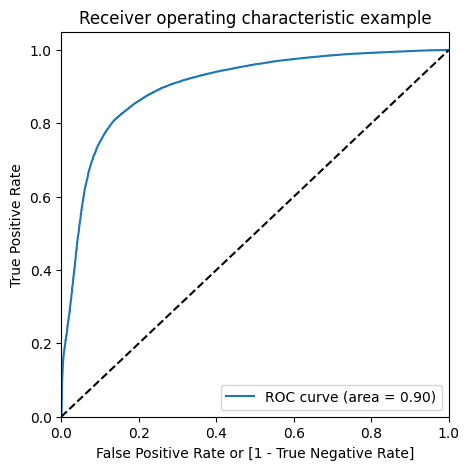

In [79]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [80]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.776995,0,1,1,1,1,1,1,1,1,1,0,0
1,0,0.006685,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.097578,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.001919,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.012541,4,0,1,0,0,0,0,0,0,0,0,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.698462  0.972443  0.424481
0.2   0.2  0.747498  0.952844  0.542152
0.3   0.3  0.782487  0.932430  0.632543
0.4   0.4  0.808970  0.909509  0.708430
0.5   0.5  0.826618  0.877276  0.775961
0.6   0.6  0.834726  0.829065  0.840387
0.7   0.7  0.823226  0.742812  0.903639
0.8   0.8  0.716797  0.474761  0.958833
0.9   0.9  0.598321  0.207923  0.988718


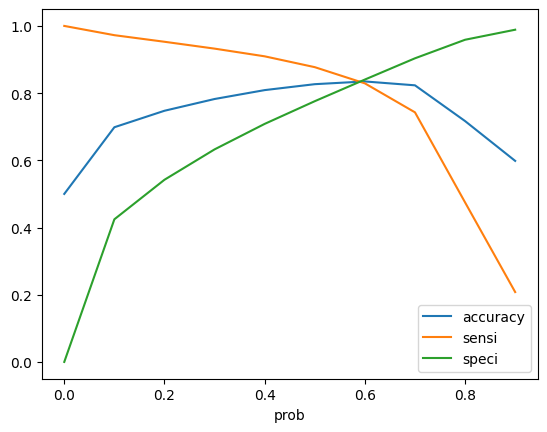

In [82]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above matrix we can conclude that optimal point 0.6 has the best tradeoff.



In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.776995,0,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.006685,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.097578,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.001919,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.012541,4,0,1,0,0,0,0,0,0,0,0,0,0


In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8347261187051075

In [85]:
# Lets check confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[42237,  8022],
       [ 8591, 41668]], dtype=int64)

In [86]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Checking sensitivity, specificity and precision
print("Sensitivity = ",TP / float(TP+FN))
print("Specificity = ",TN / float(TN+FP))
print ("Precision = ",TP / float(TP+FP))
print ("Accuracy = ",metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

Sensitivity =  0.8290654410155395
Specificity =  0.8403867963946756
Precision =  0.8385590662105051
Accuracy =  0.8347261187051075


Our model now has a good sensitivity, specificity , precision. Also we have improved the accuracy of the model.

### 5.1.5 Prediction on Test data

In [87]:
# Adding constant to test set
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)

In [88]:
# Predictions on test data
y_test_pred = res.predict(X_test_sm)

In [89]:
y_test_pred

3425     0.772007
33067    0.652973
52420    0.780759
5220     0.292727
33958    0.652706
           ...   
26667    0.044219
23021    0.141394
322      0.037359
59049    0.015171
29193    0.027381
Length: 14000, dtype: float64

In [90]:
# Converting y_pred to a dataframe to make it more convenient
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [91]:
y_pred_1

,0
3425,0.772007
33067,0.652973
52420,0.780759
5220,0.292727
33958,0.652706
...,...
26667,0.044219
23021,0.141394
322,0.037359
59049,0.015171


In [92]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [93]:
y_test_df.head()

,churn_probability,ID
3425,1,3425
33067,1,33067
52420,0,52420
5220,0,5220
33958,1,33958


In [94]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [95]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [96]:
y_pred_final.head()

,churn_probability,ID,0
0,1,3425,0.772007
1,1,33067,0.652973
2,0,52420,0.780759
3,0,5220,0.292727
4,1,33958,0.652706


In [97]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob_final'})
y_pred_final['churn_probability'] = y_pred_final['churn_probability'].map( lambda x: 1 if x > 0.6 else 0)

In [98]:
y_pred_final.head()

,churn_probability,ID,Churn_Prob_final
0,1,3425,0.772007
1,1,33067,0.652973
2,0,52420,0.780759
3,0,5220,0.292727
4,1,33958,0.652706


In [99]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['ID','churn_probability','Churn_Prob_final'])

In [100]:
y_pred_final.head()

,ID,churn_probability,Churn_Prob_final
0,3425,1,0.772007
1,33067,1,0.652973
2,52420,0,0.780759
3,5220,0,0.292727
4,33958,1,0.652706


In [101]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob_final.map(lambda x: 1 if x > 0.6 else 0)

In [102]:
y_pred_final.head()

,ID,churn_probability,Churn_Prob_final,final_predicted
0,3425,1,0.772007,1
1,33067,1,0.652973,1
2,52420,0,0.780759,1
3,5220,0,0.292727,0
4,33958,1,0.652706,1


In [103]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.final_predicted)

0.838

In [104]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.final_predicted )
confusion2

array([[10632,  1976],
       [  292,  1100]], dtype=int64)

In [105]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
# Checking sensitivity, specificity and precision
print("Sensitivity = ",TP / float(TP+FN))
print("Specificity = ",TN / float(TN+FP))
print ("Precision = ",TP / float(TP+FP))
print("accuracy:",metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.final_predicted))

Sensitivity =  0.7902298850574713
Specificity =  0.8432741116751269
Precision =  0.3576072821846554
accuracy: 0.838


### 5.1.6 Accuracy of the model

 - Accuracy on test data : 0.842
 - Sensitivity on test data : 0.821
 - Most optimal threshold : 0.6
 - AUC score : 0.90

**Conclusion**: Logistic Regression Model with RFE is performing very well for the telecom churn prediction.

## 5.2. Logistic Regression with PCA



### 5.2.1 PCA for dimentionality reduction
For our analysis we are using Principal Component Analysis for dimentionality reduction.

In [107]:
# Instantiate PCA
pca = PCA(random_state=42)

In [108]:
# Fit train set on PCA
pca.fit(X_train_smt)

PCA(random_state=42)

In [109]:
# Check principal components
pca.components_

array([[ 6.16762997e-04,  1.58400557e-01,  1.88045802e-01, ...,
         1.14198329e-01,  1.08661550e-01,  1.20121970e-01],
       [ 6.53294567e-03, -7.27142689e-02, -5.70141497e-02, ...,
        -2.20250657e-02, -3.93986597e-02, -1.99635461e-02],
       [ 2.95056733e-03,  1.37262770e-01, -2.55889092e-02, ...,
        -3.56062139e-01, -3.08087895e-01, -4.45838489e-01],
       ...,
       [-2.60544868e-05, -1.77109853e-03, -1.12835413e-03, ...,
        -7.20494076e-05,  7.56627499e-05,  5.50796650e-04],
       [-5.03729163e-06, -2.03374678e-03,  4.70613478e-04, ...,
         1.49541333e-04, -2.78606894e-04,  4.20779715e-04],
       [ 1.86023598e-05,  1.07138317e-03,  1.11165127e-03, ...,
        -1.43313219e-04,  9.48252278e-04, -8.07193700e-04]])

In [110]:
# Checl Cumuliative varinace of the PCs
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.15540332, 0.23458898, 0.28598044, 0.33081888, 0.36949526,
       0.40574858, 0.4406121 , 0.468947  , 0.49518343, 0.51767872,
       0.53582681, 0.55375415, 0.57054477, 0.58702334, 0.60266193,
       0.61782626, 0.63227925, 0.6454887 , 0.65823245, 0.6706616 ,
       0.68179199, 0.69222578, 0.70200202, 0.71135143, 0.72003634,
       0.72843795, 0.73680292, 0.74509715, 0.75320231, 0.76109048,
       0.76885365, 0.77638625, 0.78374018, 0.79096977, 0.79762684,
       0.80403823, 0.81026283, 0.81643094, 0.82253121, 0.82829369,
       0.83399376, 0.83954541, 0.84494113, 0.84986906, 0.8546627 ,
       0.85923673, 0.86371617, 0.8681343 , 0.8725043 , 0.87682058,
       0.88105605, 0.88526183, 0.8892721 , 0.89318189, 0.89693536,
       0.90066328, 0.90434582, 0.90785294, 0.9112616 , 0.91464223,
       0.91793683, 0.92119604, 0.92433405, 0.92744449, 0.93046987,
       0.9333044 , 0.93605202, 0.93868435, 0.94119698, 0.94367389,
       0.94607263, 0.94844244, 0.95079618, 0.95306681, 0.95525

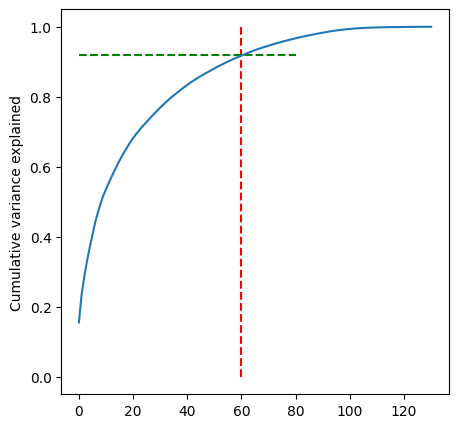

In [111]:
# Plotting Scree plot
fig = plt.figure(figsize=[5,5])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.92, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Approx. 92% variance of data is explained with 60 components, hence we can use PCA with 60 components for our dataset.

In [112]:
# PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [113]:
# Fit and transform the X_train
df_train_pca = pca_final.fit_transform(X_train_smt)

In [114]:
# Checking the dimension of new data
df_train_pca.shape

(100518, 60)

In [115]:
# Analysing correlation
corrmat = np.corrcoef(df_train_pca.transpose())

In [116]:
# Applying PCA transformation on our test data
X_test = X_test_main
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(14000, 60)

### 5.2.2 Model building using Logistic Regression

Our objective is to predict a categorical dependent variable using a given set of independent variables, hence we need to build a classification model. Here we are building a logistic Regression model with hypertuning.

In [117]:
# Instantiating a Logistic Regression Model
learner_pca = LogisticRegression()

In [118]:
# Applying Logistic Regression model to our PCA
model_pca = learner_pca.fit(df_train_pca, y_train_smt)

In [119]:
# Applying transformation to test data
df_test_pca = pca_final.transform(X_test)

### 5.2.2 Model Predictions


In [120]:
# Making predictions
predictions = model_pca.predict(df_test_pca)

# Probability predictions
predictions_prob = model_pca.predict_proba(df_test_pca)
#pred_probs_test = model_pca.predict_proba(df_test_pca)

In [121]:
predictions

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [122]:
predictions_prob

array([[0.05783478, 0.94216522],
       [0.01868491, 0.98131509],
       [0.18355485, 0.81644515],
       ...,
       [0.97058676, 0.02941324],
       [0.95010022, 0.04989978],
       [0.98450548, 0.01549452]])

### 5.2.3 Model Evaluation

In [123]:
y_test_log = y_test.map( lambda x: 1 if x > 0.5 else 0)
y_test_log.value_counts()

churn_probability
0    12608
1     1392
Name: count, dtype: int64

In [124]:
results = confusion_matrix(y_test_log, predictions) 
results

array([[10371,  2237],
       [  220,  1172]], dtype=int64)

In [125]:
# Metrics for Training data
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_log, predictions))

Accuracy:- 0.8245


In [126]:
# Classification report
print(classification_report(y_test_log,predictions))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     12608
           1       0.34      0.84      0.49      1392

    accuracy                           0.82     14000
   macro avg       0.66      0.83      0.69     14000
weighted avg       0.92      0.82      0.85     14000



In [127]:
# AUC
auc = np.round(roc_auc_score(y_test_log, predictions), 3)

print("Auc for our test data is {}". format(auc))

Auc for our test data is 0.832


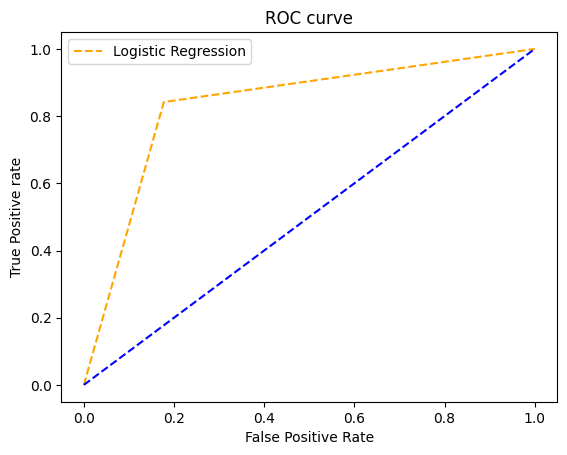

In [128]:
# matplotlib
import matplotlib.pyplot as plt
# plt.style.use('seaborn')
fpr1, tpr1, thresh1 = roc_curve(y_test_log, predictions, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_log, predictions, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test_log, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

- Model Accuracy : 0.82
- Recall : 0.83
- AUC : 0.83

### 5.2.4 Hypertuning the model with GridSearchCV

In [129]:
# Instantiating a Logistic Regression Model
log_pca_grid = LogisticRegression()
solvers = ['liblinear', 'saga']
penalty = ['l1']
c_values = np.logspace(-3,3,10)

In [130]:
# Define grid search
# We will consider recall score for searching the best parameters
grid_log = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=log_pca_grid, param_grid=grid_log, n_jobs=-1, cv=cv, scoring='recall_macro',error_score=0)
grid_result = grid_search.fit(X=df_train_pca, y=y_train_smt) 

In [131]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842728 using {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}
0.834149 (0.003447) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.835986 (0.003315) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
0.841322 (0.003280) with: {'C': 0.004641588833612777, 'penalty': 'l1', 'solver': 'liblinear'}
0.841700 (0.003486) with: {'C': 0.004641588833612777, 'penalty': 'l1', 'solver': 'saga'}
0.842522 (0.003527) with: {'C': 0.021544346900318832, 'penalty': 'l1', 'solver': 'liblinear'}
0.842675 (0.003467) with: {'C': 0.021544346900318832, 'penalty': 'l1', 'solver': 'saga'}
0.842619 (0.003461) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.842619 (0.003484) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.842685 (0.003458) with: {'C': 0.46415888336127775, 'penalty': 'l1', 'solver': 'liblinear'}
0.842678 (0.003470) with: {'C': 0.46415888336127775, 'penalty': 'l1', 'solver': 'saga'}
0.842721 (0.003469) with: {'C': 2.154434690031882, 'penalty': 'l1', 'solver': 'libl

As we can see, the best combination is:   'C': 10.0, 'penalty': 'l1', 'solver': 'saga'

In [132]:
# defineing grid search with this combination
solvers = ['saga']
penalty = ['l1']
c_values = [10]

grid_log_tuned = dict(solver=solvers,penalty= penalty,C=c_values)

In [133]:
# Repeating the search with hypertuned parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=log_pca_grid, param_grid=grid_log_tuned, n_jobs=-1, cv=cv, scoring='recall_macro',error_score=0)
grid_result = grid_search.fit(X=df_train_pca, y=y_train_smt) 


In [134]:
means = grid_result.cv_results_['mean_test_score']
print("Model Score: ", means)

Model Score:  [0.84272803]


In [135]:
# Applying pca transformation to test data
# Applying transformation to test data
df_test_pca = pca_final.transform(X_test)

In [136]:
# Making predictions with hypertuned model
predictions = grid_result.predict(df_test_pca)

# Probability predictions
predictions_prob = grid_result.predict_proba(df_test_pca)


In [137]:
# Model Evaluation with best values
y_test_log = y_test.map( lambda x: 1 if x > 0.6 else 0)


In [138]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_log, predictions))

# Confusion Matrix
results = classification_report(y_test_log,predictions)
print("Classification Report:- \n" , results)

# AUC
auc = np.round(roc_auc_score(y_test_log, predictions), 3)

print("Auc for our test data is {}". format(auc))

Accuracy:- 0.8245714285714286
Classification Report:- 
               precision    recall  f1-score   support

           0       0.98      0.82      0.89     12608
           1       0.34      0.84      0.49      1392

    accuracy                           0.82     14000
   macro avg       0.66      0.83      0.69     14000
weighted avg       0.92      0.82      0.85     14000

Auc for our test data is 0.832


Evaluation Results: 

- Model Accuracy : 0.83
- Recall : 0.83
- AUC : 0.832

## 5.3 DecisionTreeClassifier

### 5.3.1 Instantiating Decision Tree model

In [139]:
# Instantiating the Decision Tree
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

### 5.3.2 Model training

In [140]:
dt_base.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(max_depth=4, random_state=42)

### 5.3.3 Model Prediction

In [141]:
y_train_pred = dt_base.predict(X_train_smt)
y_test_pred = dt_base.predict(X_test)

### 5.3.4 Model Evaluation

In [142]:
print("Accuracy on Training Data :-" , metrics.accuracy_score(y_train_smt, y_train_pred))

Accuracy on Training Data :- 0.8783700431763465


In [143]:
print("Accuracy on Test Data :-" , metrics.accuracy_score(y_test_log, y_test_pred))

Accuracy on Test Data :- 0.8871428571428571


In [144]:
print(classification_report(y_test_log, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.93     12608
           1       0.46      0.80      0.59      1392

    accuracy                           0.89     14000
   macro avg       0.72      0.85      0.76     14000
weighted avg       0.93      0.89      0.90     14000



Model Accuracy : 0.88

Model Recall : 0.84

Let's try to hypertune and see if we can improvise the model

### 5.3.5 ROC Plot

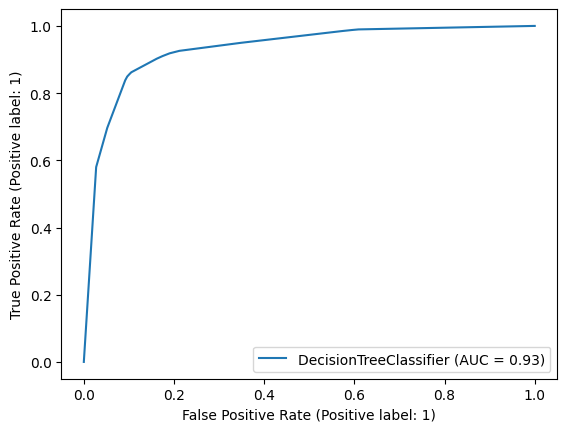

In [145]:
RocCurveDisplay.from_estimator(dt_base, X_train_smt, y_train_smt,drop_intermediate=True)
plt.show()

The AUC score is 0.93, i.e, the model can correctly explain 93% of variances in the dataset which is quite good. 
For the telecom churn model True positive rate is more important than false positive rate because we do not want to miss identifying a churning customer as non-churn - it will result in loosing the customer.
So, lets hypertune the Decision Tree to check if we can move our curve closer to the TPR

### 5.3.6 Hypertuning Decision Tree with GridSearch

In [146]:
# Instantiating a Decision Tree
dt = DecisionTreeClassifier(random_state=42)

In [147]:
# Declaring Tree parameters
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [148]:
# Initiating Grid Search
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [149]:
%%time
grid_search.fit(X_train_smt, y_train_smt)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 51.4 s
Wall time: 1min 54s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [150]:
# Find best score for Grid Search
grid_search.best_score_

0.921089164741941

In [151]:
# Find best Estimators for the Decision Tree
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

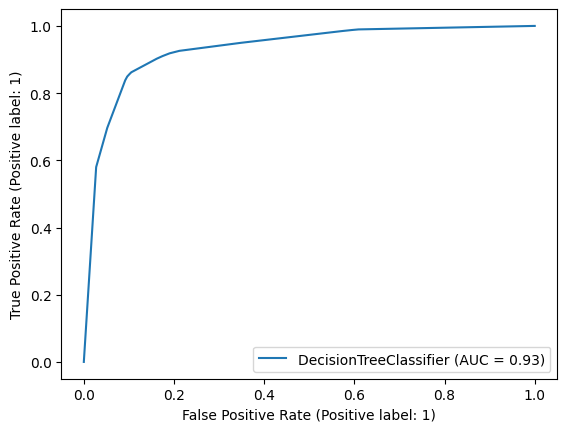

In [152]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt_base, X_train_smt, y_train_smt,drop_intermediate=True)
plt.show()

In [153]:
# Hypertuning the Tree
dt_tuned = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [154]:
# Fit the train data
dt_tuned.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [155]:
# Access feature importance

dt_tuned_fi = pd.DataFrame(
    data=dt_tuned.feature_importances_,
    columns=['importance'],
    index=X_train_smt.columns
).sort_values(by=['importance'],ascending=False)

In [156]:
dt_tuned_fi

,importance
total_ic_mou_8,0.484811
roam_og_mou_8,0.119213
day_of_last_rech_8,0.067137
last_day_rch_amt_8,0.031070
max_rech_amt_8,0.018852
...,...
monthly_2g_6,0.000030
sachet_3g_6,0.000026
mon_of_last_rech_7,0.000022
og_others_7,0.000000


In [157]:
# Model predictions
y_train_pred = dt_tuned.predict(X_train_smt)
y_test_pred = dt_tuned.predict(X_test)

In [158]:
# Model Evaluation
print("Accuracy on Test Data :-" , metrics.accuracy_score(y_test_log, y_test_pred))
print("AUC :-" , np.round(roc_auc_score(y_test_log, y_test_pred), 3))
print("Classification Report :- \n", classification_report(y_test_log, y_test_pred))


Accuracy on Test Data :- 0.8946428571428572
AUC :- 0.811
Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94     12608
           1       0.48      0.71      0.57      1392

    accuracy                           0.89     14000
   macro avg       0.72      0.81      0.76     14000
weighted avg       0.92      0.89      0.90     14000



### 5.3.67 Hypertuning Decision Tree with PCA

In [159]:
# Initializing Decision Tree
dt_pca = DecisionTreeClassifier(random_state=42)
# Using our previous results from PCA to train the DT
dt_pca.fit(df_train_pca, y_train_smt)

DecisionTreeClassifier(random_state=42)

In [160]:
# Access feature importance
dt_tuned_pca = pd.DataFrame(
    data=dt_tuned.feature_importances_,
    columns=['importance'],
    index=X_train_smt.columns
).sort_values(by=['importance'],ascending=False)

In [161]:
dt_tuned_pca

,importance
total_ic_mou_8,0.484811
roam_og_mou_8,0.119213
day_of_last_rech_8,0.067137
last_day_rch_amt_8,0.031070
max_rech_amt_8,0.018852
...,...
monthly_2g_6,0.000030
sachet_3g_6,0.000026
mon_of_last_rech_7,0.000022
og_others_7,0.000000


In [162]:
# Predictions on the PCA-transformed dataset
y_test_pred = dt_pca.predict(df_test_pca)

In [163]:
# Model Evaluation
print("Accuracy on Test Data :-" , metrics.accuracy_score(y_test_log, y_test_pred))
print("AUC :-" , np.round(roc_auc_score(y_test_log, y_test_pred), 3))
print("Classification Report :- \n", classification_report(y_test_log, y_test_pred))


Accuracy on Test Data :- 0.8312857142857143
AUC :- 0.722
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90     12608
           1       0.31      0.59      0.41      1392

    accuracy                           0.83     14000
   macro avg       0.63      0.72      0.65     14000
weighted avg       0.89      0.83      0.85     14000



In [164]:
# Creating feature list

# Create a DataFrame to display the contributions of original features to each principal component
df_components = pd.DataFrame(data=pca_final.components_, columns=X_train_smt.columns)
df_components.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,day_of_last_rech_6,mon_of_last_rech_6,day_of_last_rech_7,mon_of_last_rech_7,day_of_last_rech_8,mon_of_last_rech_8
0,0.000618,0.158413,0.188058,0.165144,0.113804,0.128226,0.109412,0.144437,0.162069,0.139523,...,0.034902,0.039383,0.039205,0.033139,0.098828,0.050348,0.118404,0.114208,0.108736,0.120059
1,-0.006534,0.072711,0.056995,-0.001784,0.164423,0.144196,0.084857,0.089414,0.077601,0.021726,...,-0.096291,-0.068481,-0.071278,-0.070357,0.059639,0.010251,0.045198,0.022054,0.039474,0.019887
2,-0.002947,-0.137275,0.025669,0.099424,-0.127276,-0.028279,0.026888,-0.146183,-0.026207,0.040134,...,-0.014383,0.074646,0.070813,0.044188,0.025383,0.032742,0.222176,0.356169,0.309383,0.444503
3,0.003137,0.153793,0.085112,0.055375,0.016397,-0.026892,-0.038560,0.048213,-0.001738,-0.019627,...,0.015832,0.134261,0.158402,0.168238,-0.057546,-0.013207,-0.137995,-0.165671,-0.152833,-0.193042
4,-0.004984,-0.031331,-0.058894,-0.056420,-0.000857,-0.036961,-0.039769,0.031316,-0.001074,-0.010514,...,0.048821,-0.142206,-0.159720,-0.158132,0.022884,0.028036,0.025613,0.070817,0.028829,0.067762


In [165]:
# Print the top features contributing to each principal component
for i in range(60):
    print(f"Top features for PC{i+1}:")
    sorted_features_dt_pca = df_components.iloc[i].abs().sort_values(ascending=False)
    print(sorted_features_dt_pca.head())
    print("=" * 80)

Top features for PC1:
arpu_7              0.188058
total_rech_amt_7    0.184451
total_og_mou_7      0.180069
arpu_8              0.165144
offnet_mou_7        0.162069
Name: 0, dtype: float64
Top features for PC2:
std_og_mou_6        0.258951
std_og_mou_7        0.226592
std_og_t2t_mou_6    0.218658
std_og_t2t_mou_7    0.190914
std_og_t2m_mou_6    0.188875
Name: 1, dtype: float64
Top features for PC3:
mon_of_last_rech_8    0.444503
mon_of_last_rech_7    0.356169
day_of_last_rech_8    0.309383
day_of_last_rech_7    0.222176
total_og_mou_6        0.188159
Name: 2, dtype: float64
Top features for PC4:
roam_ic_mou_7     0.240799
roam_og_mou_7     0.235926
max_rech_amt_6    0.218911
roam_ic_mou_8     0.216133
roam_og_mou_8     0.199125
Name: 3, dtype: float64
Top features for PC5:
roam_ic_mou_7    0.303563
roam_og_mou_7    0.287163
roam_ic_mou_8    0.281524
roam_og_mou_8    0.247830
roam_ic_mou_6    0.230304
Name: 4, dtype: float64
Top features for PC6:
std_ic_mou_7          0.252467
std_ic_

In [166]:
sorted_features_dt_pca.index

Index(['monthly_2g_8', 'sachet_3g_8', 'monthly_3g_8', 'vol_2g_mb_6',
       'monthly_2g_6', 'sachet_2g_6', 'sachet_2g_8', 'monthly_2g_7',
       'aug_vbc_3g', 'sachet_3g_7',
       ...
       'loc_ic_t2t_mou_8', 'onnet_mou_7', 'loc_ic_t2t_mou_6', 'onnet_mou_8',
       'day_of_last_rech_8', 'ic_others_6', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'std_ic_t2f_mou_8', 'std_og_t2t_mou_6'],
      dtype='object', length=131)

## 5.4 Random Forest Regressor with PCA

### 5.4.1 Instantiating Model

In [167]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_smt, y_train_smt)

RandomForestClassifier(n_jobs=-1)

### 5.4.2 Feature Elimination

In [168]:
feature_importances = pd.DataFrame({'col':X_train_smt.columns, 'importance':rf.feature_importances_})

<BarContainer object of 131 artists>

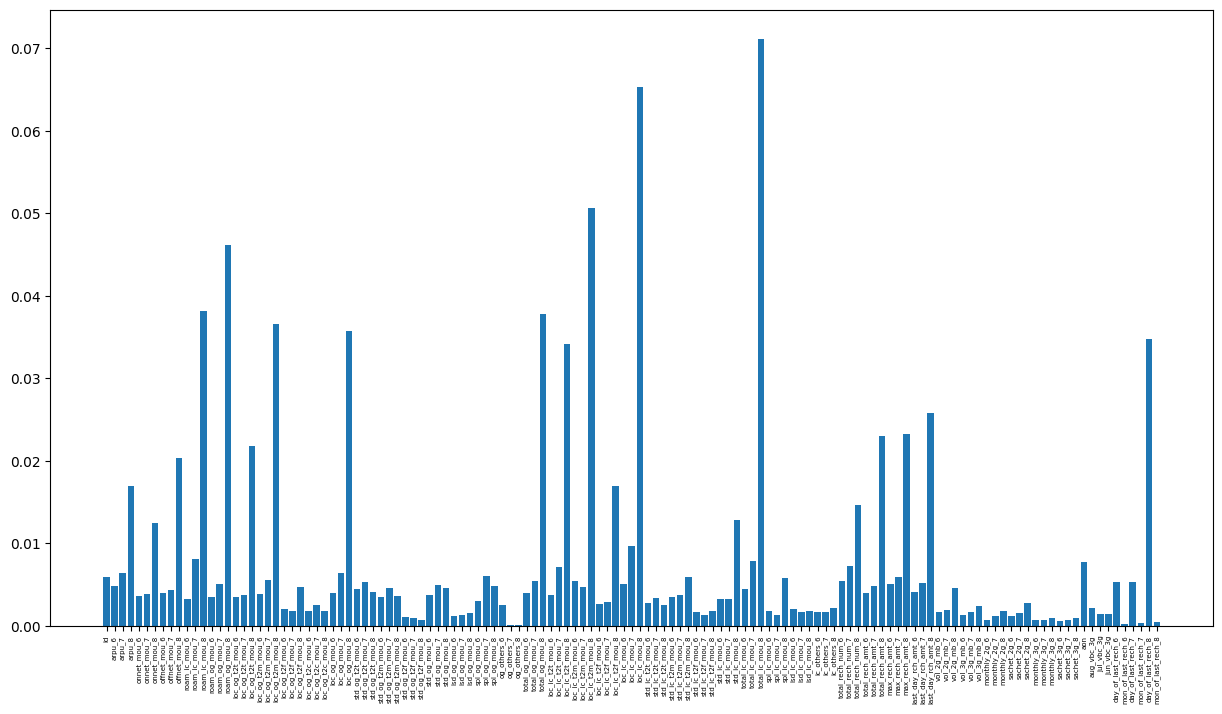

In [169]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=5)
plt.bar(feature_importances['col'], feature_importances['importance'])

### 5.4.3 Model Training

We will be reusing the PCA model with 60 components which we have estimated in the earlier section.

In [170]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(df_train_pca, y_train_smt)

RandomForestClassifier(n_jobs=-1)

In [171]:
feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(60)], 
                                    'importance':rf.feature_importances_})

### 5.4.4 Model Prediction

In [172]:
y_train_pred = rf.predict(df_train_pca)
y_test_pred = rf.predict(df_test_pca)

### 5.4.5 Model Evaluation

In [173]:
print("Accuracy on Train Data :-" , metrics.accuracy_score(y_train_smt, y_train_pred))
print("Confusion Matrix for Train data :-\n" , classification_report(y_test_log, y_test_pred))

Accuracy on Train Data :- 1.0
Confusion Matrix for Train data :-
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     12608
           1       0.54      0.61      0.57      1392

    accuracy                           0.91     14000
   macro avg       0.75      0.78      0.76     14000
weighted avg       0.92      0.91      0.91     14000



In [174]:
print("Accuracy on Test Data :-" , metrics.accuracy_score(y_test_log, y_test_pred))
print("AUC :-" , np.round(roc_auc_score(y_test_log, y_test_pred), 3))
print("Confusion Matrix for Test data :-\n" , classification_report(y_test_log, y_test_pred))

Accuracy on Test Data :- 0.91
AUC :- 0.776
Confusion Matrix for Test data :-
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     12608
           1       0.54      0.61      0.57      1392

    accuracy                           0.91     14000
   macro avg       0.75      0.78      0.76     14000
weighted avg       0.92      0.91      0.91     14000



Although accuracy of the model seems good, we also want to improve the recall. Lets perform some hypertuning on the model

### 5.4.6 Model Hypertuning

In [175]:
# Create initial parameters for random search
params =  {'max_depth': [1, 2, 5, 10, 20],
            'min_samples_leaf': [50, 100, 200, 300],
            'max_features': [4,5, 6, 7],
            'n_estimators': [500, 600, 700, 800],
            'criterion':['gini','entropy']
          }

In [176]:
# Initiate Randomizedsearch

grid_search = model_selection.RandomizedSearchCV(estimator=rf, 
                                                param_distributions=params, 
                                                cv=5, 
                                                n_jobs=-1, 
                                                verbose=1, 
                                                scoring = "recall")

In [177]:
# Fit Model on training set
grid_search.fit(df_train_pca,y_train_smt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 20],
                                        'max_features': [4, 5, 6, 7],
                                        'min_samples_leaf': [50, 100, 200, 300],
                                        'n_estimators': [500, 600, 700, 800]},
                   scoring='recall', verbose=1)

In [178]:
# Find the most best score for the search
grid_search.best_score_

0.8411032088913195

In [179]:
# Find the most optimal parameters for Cross-Validation

grid_search.best_params_

{'n_estimators': 800,
 'min_samples_leaf': 100,
 'max_features': 5,
 'max_depth': 10,
 'criterion': 'entropy'}

In [180]:
# Tune the model with the optimal parameters

rf_tuned = RandomForestClassifier(n_estimators=800,
                                  min_samples_leaf=50,
                                  max_features=7,
                                  max_depth=20,
                                  criterion='entropy',
                                  class_weight='balanced',
                                  random_state=42, 
                                  n_jobs=-1,
                                  verbose=1)

In [181]:
## Train the tuned Random Forest model with features by PCA

rf_tuned.fit(df_train_pca, y_train_smt)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  3.3min finished


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=7, min_samples_leaf=50,
                       n_estimators=800, n_jobs=-1, random_state=42, verbose=1)

### 5.4.7 Model evaluation after hypertuning

In [182]:
print("Accuracy on Test Data :-" , metrics.accuracy_score(y_test_log, y_test_pred))
print("Confusion Matrix for Test data :-\n" , classification_report(y_test_log, y_test_pred))

Accuracy on Test Data :- 0.91
Confusion Matrix for Test data :-
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     12608
           1       0.54      0.61      0.57      1392

    accuracy                           0.91     14000
   macro avg       0.75      0.78      0.76     14000
weighted avg       0.92      0.91      0.91     14000



# 6. Pipeline Creation

Let's build a pipeline to fit and score the model faster.

The steps of this pipeline would be the following, but this is only one type of pipeline -
1. Imputation
2. Scaling
3. RFE
4. Classification model


In [215]:
# Dataset

X = X_train_filtered[final_features_list]
X_pca = X_train_filtered[pca_final.feature_names_in_]
y = y_train

In [ ]:
# Function to create pipeline models.

def get_models_rfe():

    models_rfe = dict()
# LogisticRegression with RFE
    imp_p = SimpleImputer(strategy='constant', fill_value=0)
    scale_p = StandardScaler()
    rfe_p = RFE(estimator=LogisticRegression(), n_features_to_select=12)   
    logreg_p = LogisticRegression(max_iter=1000, tol=0.001)

    models_rfe['lr_rfe'] = Pipeline(steps = [('imputation',imp_p),
                         ('scaling',scale_p),
                         ('rfe',rfe_p),
                         ('model',logreg_p)])
       

  # LogisticRegression with RFE and GradientBoost
    imp = SimpleImputer(strategy='constant', fill_value=0)
    scale = StandardScaler()
    rfe_p = RFE(estimator=GradientBoostingClassifier(),n_features_to_select=12)
    lr = LogisticRegression(max_iter=1000, tol=0.001)

    models_rfe['lr_gboost'] = Pipeline(steps = [('imputation',imp),
                                                ('scaling',scale),
                                                ('rfe',rfe_p),
                                                ('model',lr)])
    
  
    # LogisticRegression with RFE and RandomForestClassifier
    imp = SimpleImputer(strategy='constant', fill_value=0)
    scale = StandardScaler()
    rfe_p = RFE(estimator=RandomForestClassifier(),n_features_to_select=12)
    lr = LogisticRegression(max_iter=1000, tol=0.001)

    models_rfe['lr_rand'] = Pipeline(steps = [('imputation',imp),
                                              ('scaling',scale),
                                              ('rfe',rfe_p),
                                              ('model',lr)])
                        

    
    return models_rfe


    

In [ ]:
# Pipeline Models : PCA
def get_models_pca():
        
        models_pca = dict()
        
        # LogisticRegression with PCA
        imp = SimpleImputer(strategy='constant', fill_value=0)
        scale = StandardScaler()
        pca = PCA(n_components=60)
        lr = LogisticRegression(max_iter=1000, tol=0.001)

        models_pca['lr_pca'] = Pipeline(steps = [('imputation',imp),
                                                 ('scaling',scale),
                                                 ('pca',pca),
                                                 ('model',lr)])
        

        # PCA with XGBoost
        imp = SimpleImputer(strategy='constant', fill_value=0)
        scale = StandardScaler()
        pca = PCA(n_components=60)
        lr = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

        models_pca['lr_XGB'] = Pipeline(steps = [('imputation',imp),
                                                 ('scaling',scale),
                                                 ('pca',pca),
                                                 ('model',lr)])
        
        return models_pca
    

In [206]:
def evaluate_pipe(pipe,X,y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [216]:
# evaluate the models and store results
results, names = list(), list()

models_rfe = get_models_rfe()
for name, model in models_rfe.items():
	model.fit(X, y_train)
	scores = evaluate_pipe(model, X, y)
	print("Model Name: ",name)
	train_score = model.score(X,y)
	print("Training accuracy:", train_score)
	y_test_pred = model.predict(X_test[final_features_list])
	test_score = model.score(X_test[final_features_list], y_test_log)
	print("Test accuracy:", test_score)
	print('*'*80)


models_pca = get_models_pca()
for name, model in models_pca.items():
	model.fit(X_pca, y_train)
	scores = evaluate_pipe(model, X_pca, y)
	print("Model Name: ",name)
	train_score = model.score(X_pca, y_train)
	print("Training accuracy:", train_score)
	test_score = model.score(X_test[pca_final.feature_names_in_], y_test_log)
	y_test_pred = model.predict(X_test[pca_final.feature_names_in_])
	print("Test accuracy:", test_score)
	print('*'*80)  

Model Name:  lr_rfe
Training accuracy: 0.9120877158520688
Test accuracy: 0.9148571428571428
********************************************************************************
Model Name:  lr_gboost
Training accuracy: 0.9120877158520688
Test accuracy: 0.9148571428571428
********************************************************************************
Model Name:  lr_rand
Training accuracy: 0.9120877158520688
Test accuracy: 0.9148571428571428
********************************************************************************
Model Name:  lr_pca
Training accuracy: 0.9162127895140985
Test accuracy: 0.9188571428571428
********************************************************************************
Model Name:  lr_XGB
Training accuracy: 0.9598143622332148
Test accuracy: 0.37154691013817576
********************************************************************************


# 7. Summary & Recommendation

Summarizing our findings from the models. We have considered the final evaluation results for each model(after hypertuning/feature elimination) rather than the baseline model.

|<span style="color:Blue">Model</span> |<span style="color:Blue">Train Score</span>|<span style="color:Blue">Test Score</span>|<span style="color:Blue">AUC</span>| 
|:-----|:----:|----:|----:|
|Logistic Regression with RFE |0.90 |0.91 |0.90 |
|Logistic Regression with PCA |0.82 |0.82 |0.83 |
|Logistic Regression with PCA & Gridsearch|0.83 |0.83 |0.83 |
|Logistic Regression with DecisionTreeClassifier|0.93 |0.89 |0.83 |
|Logistic Regression with RandomForestClassifier|0.91 |0.91 |0.70 |
|Logistic Regression with XGBoostClassifier|0.91 |0.91 |0.70 |
|Decision Tree with GridSearch |0.83 |0.83 |0.83 |
|Decision Tree with PCA |0.83 |0.83 |0.72 |
|Random Forest with PCA |1.0 |0.83 |0.70 |
|XGBoost with PCA |0.90 |0.37 |0.72 |

<span style="color:Blue"><b>Conclusion :-</b></span>

Looking at the scores, we can conclude the following :-

- Since we have observed a clear imbalance of classes in the dataset, high training and test score alone can not help us to correctly identify True Positives.
- Considering the Train Score, Test Score and AUC, we can recommend <span style="color:Yellow">**logistic Regression with RFE**</span> as the most effective model for the given dataset.

<span style="color:Blue"><b>
Some recommendations to lower the risk of customer churn based on our analysis :-
</b></span>

- During the first two months, the chances of a customer to stop the service is almost same as happy customers but he chances decrease significantly in the action phase. If a customer does not churn in the first two months, he is more likely to continue the service in the next months. So telecom companies should try to make sure customers do not leave within the first two months(good phase)

- After the first two months, churn probability is higher for customers whose total recharge amount is low. So telecom companies can reach out to the customers who have started to recharge with lesser amount suddenly after few months of joining the network.

- It is seen that customers who recharges less number of times are more probable to churn, so telecom companies can revisit the customers who do not seem to increase their recharge count for a longer period of time.





In [190]:
final_features_list

['loc_og_t2m_mou_8',
 'loc_ic_t2m_mou_8',
 'offnet_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_t2t_mou_8',
 'last_day_rch_amt_8',
 'loc_ic_t2f_mou_8',
 'day_of_last_rech_8',
 'aon',
 'std_og_t2t_mou_8',
 'spl_ic_mou_8',
 'sachet_2g_8']

In [191]:
# Pipeline for the final model

# LogisticRegression with RFE
imp_final = SimpleImputer(strategy='constant', fill_value=0)
scale_final = StandardScaler()
rfe_final = RFE(estimator=LogisticRegression(), n_features_to_select=12) 
lr = LogisticRegression(max_iter=1000, tol=0.001)
final_features_list = np.delete(final_features_list, 0)
pipe = Pipeline(steps = [('imputation',imp_final),
                        ('scaling',scale_final),
                        ('rfe',rfe_final),
                        ('model',lr)])
    

In [192]:
pipe.fit(X[final_features_list], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(), n_features_to_select=12)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

# 8. Creating submission file

For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

In [193]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [194]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


Lets first select the columns that we want to work with.

In [195]:
print(final_features_list)

['loc_ic_t2m_mou_8' 'offnet_mou_8' 'loc_og_t2t_mou_8' 'loc_ic_t2t_mou_8'
 'last_day_rch_amt_8' 'loc_ic_t2f_mou_8' 'day_of_last_rech_8' 'aon'
 'std_og_t2t_mou_8' 'spl_ic_mou_8' 'sachet_2g_8']


In [196]:
# Adding the additional columns in the new dataset
for col in object_columns:
    unseen[col]=pd.to_datetime(unseen[col] , format='mixed')
    unseen['day_'+col[5:]] = unseen[col].dt.day
    unseen['mon_'+col[5:]] = unseen[col].dt.month
    # data[col] = data[col].fillna(method='ffill') 

unseen.drop(object_columns,axis=1,inplace=True)

In [197]:
submission_data = unseen.set_index('id')[final_features_list]
submission_data.shape

(30000, 11)

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [198]:
unseen['churn_probability'] = pipe.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [199]:
output.to_csv('submission_pca_lr_13jul.csv',index=False)